In [3]:
# Important Libaries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Flatten, BatchNormalization, Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.applications import ResNet101
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.models import Model
from tensorflow.keras.metrics import CategoricalAccuracy, BinaryAccuracy, Precision, Recall, F1Score

In [2]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"developmentboy","key":"72138c1eb0ec5e982ca6212d8ebe8fd4"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 81% 49.0M/60.3M [00:00<00:00, 114MB/s] 
100% 60.3M/60.3M [00:00<00:00, 116MB/s]


In [9]:
! unzip fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [10]:
import os
# Path to the training the testing folder
train_data_gen = os.listdir('/content/test')
test_data_gen = os.listdir('/content/test')
#valid_data_gen  = os.listdir('/content/test')

**Expolatory Data Analysis**

In [11]:
from PIL import Image
from collections import Counter

In [12]:
# Method to print out the number of directories and images in it
def EDA(directory):
  cat = os.listdir(directory)
  print(f"Categories in {directory}:{cat}")
  for cate in cat:
    cat_path = os.path.join(directory, cate)
    num_img = len(os.listdir(cat_path))
    print(f"Category: {cate}, No of Images: {num_img}")


In [13]:
train_path = "/content/train"
test_path = "/content/test"
#valid_path = "/content/drive/MyDrive/My_App_data/CK+48_splitted/val"

Method to create the validation folder from the traninng set

In [14]:
import os
import random
import shutil
# Path to the directories
train_path = "/content/train"
valid_path = "/content/valid"

# Create a structure for validatio directoyr

if not os.path.exists(valid_path):
  os.makedirs(valid_path)
  for cl_name in os.listdir(train_path):
    os.makedirs(os.path.join(valid_path,cl_name))





In [15]:
# creating a validation directory
valid_splt =  0.2
for cl_name in os.listdir(train_path):
  cl_path =  os.path.join(train_path, cl_name)
  img = os.listdir(cl_path)
  random.shuffle(img)
  num_valid = int(len(img)*valid_splt)
  valid_img =  img[:num_valid]
  # Moving images to directory
  for img in valid_img:
    src = os.path.join(cl_path, img)
    dest_dir = os.path.join(valid_path, cl_name) # Get the destination directory
    if not os.path.exists(dest_dir): # Check if the destination directory exists
      os.makedirs(dest_dir)          # If not, create it
    dest =  os.path.join(dest_dir, img)
    shutil.move(src, dest)
print("done succesfully")

done succesfully


In [16]:
EDA(train_path)
EDA(test_path)
EDA(valid_path)

Categories in /content/train:['angry', 'happy', 'disgust', 'sad', 'neutral', 'fear', 'surprise']
Category: angry, No of Images: 3196
Category: happy, No of Images: 5772
Category: disgust, No of Images: 349
Category: sad, No of Images: 3864
Category: neutral, No of Images: 3972
Category: fear, No of Images: 3278
Category: surprise, No of Images: 2537
Categories in /content/test:['angry', 'happy', 'disgust', 'sad', 'neutral', 'fear', 'surprise']
Category: angry, No of Images: 958
Category: happy, No of Images: 1774
Category: disgust, No of Images: 111
Category: sad, No of Images: 1247
Category: neutral, No of Images: 1233
Category: fear, No of Images: 1024
Category: surprise, No of Images: 831
Categories in /content/valid:['angry', 'happy', 'disgust', 'sad', 'neutral', 'fear', 'surprise']
Category: angry, No of Images: 799
Category: happy, No of Images: 1443
Category: disgust, No of Images: 87
Category: sad, No of Images: 966
Category: neutral, No of Images: 993
Category: fear, No of Ima

In [17]:
# to plot the images and their categories
def plotting_image(directory, samples = 5):
  cat = os.listdir(directory)
  for cate in cat:
    cat_path = os.path.join(directory, cate)
    img = os.listdir(cat_path)[:samples]
    plt.figure(figsize = (15,15))
    for i, image_name in enumerate(img):
      img_pat = os.path.join(cat_path, image_name)
      image = Image.open(img_pat)
      plt.subplot(1, samples, i+1)
      plt.imshow(image,  cmap='gray')
      plt.title(f"Category:{cate}")
      plt.axis('off')
    plt.show()


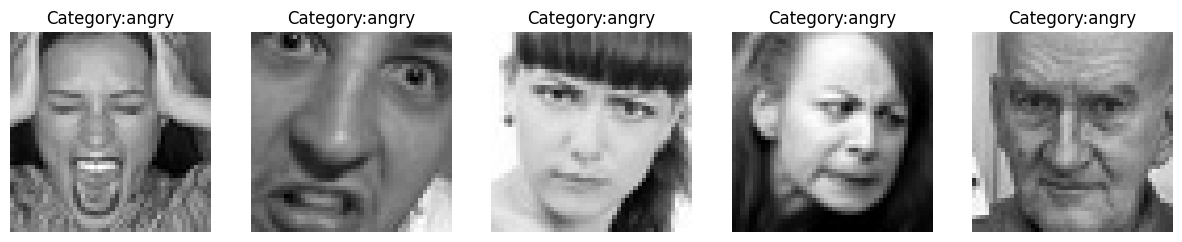

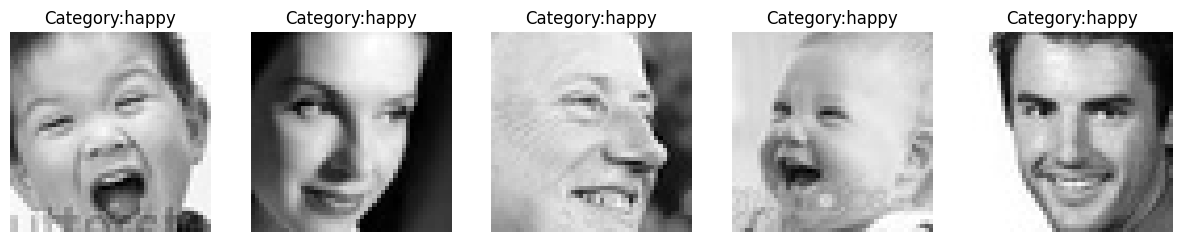

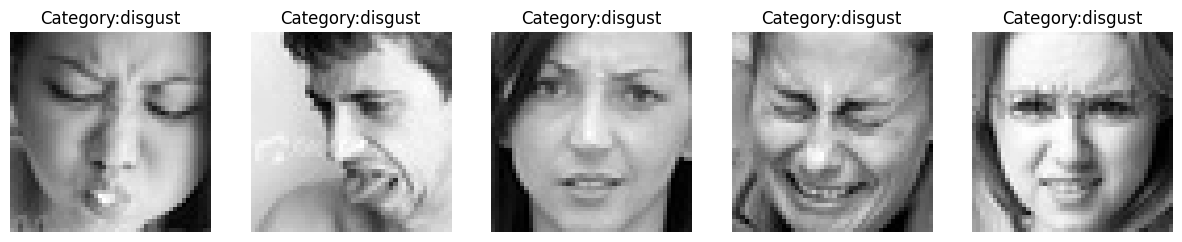

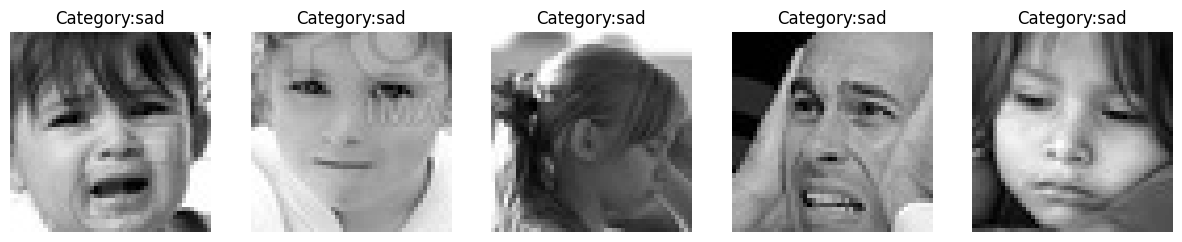

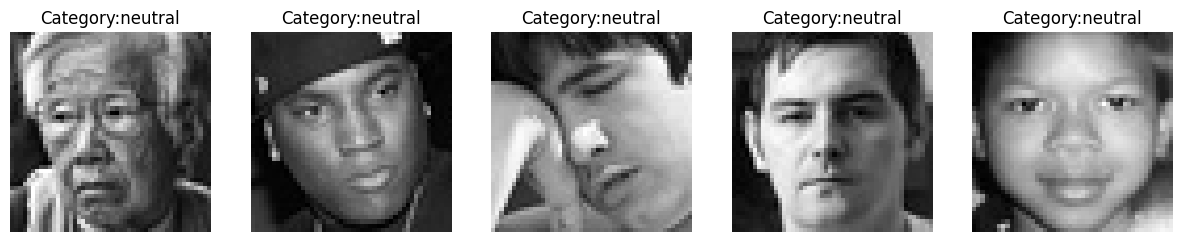

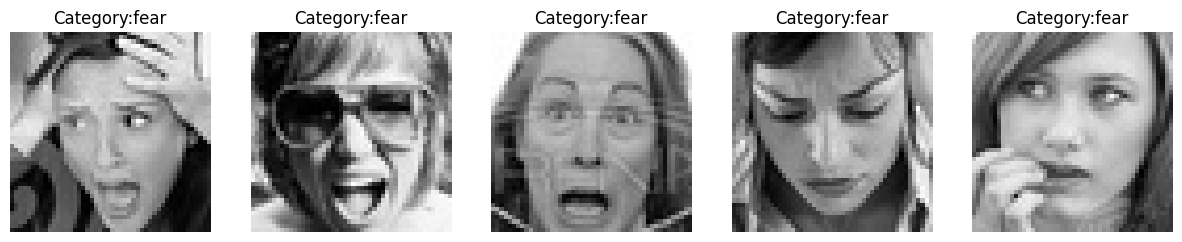

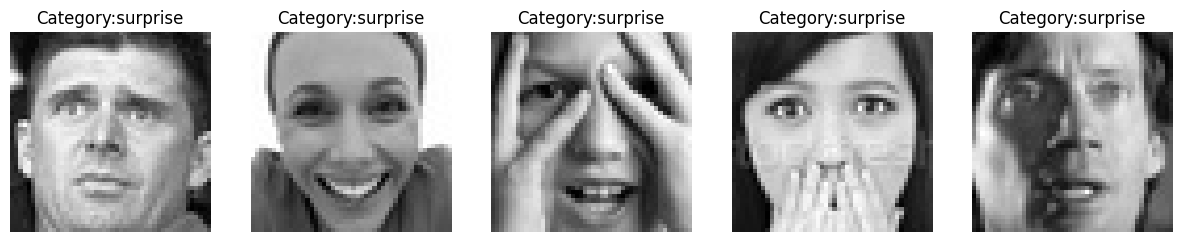

In [18]:
# Plotting the training directory images
plotting_image(train_path)

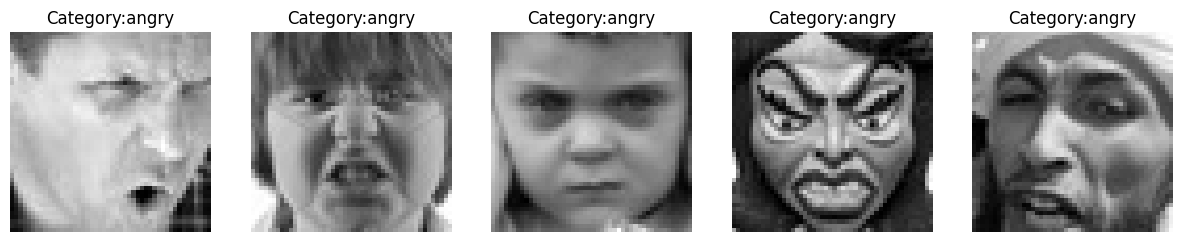

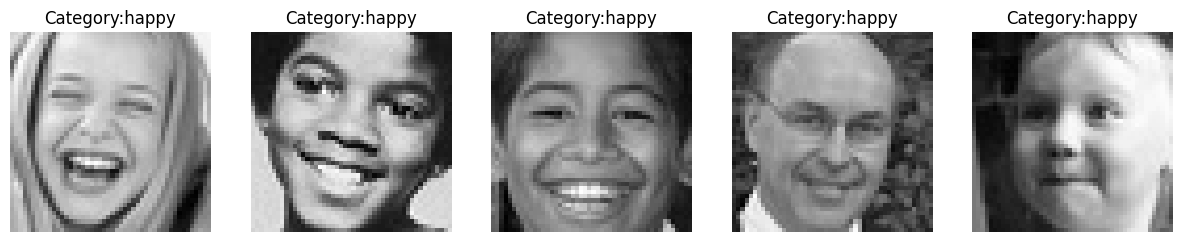

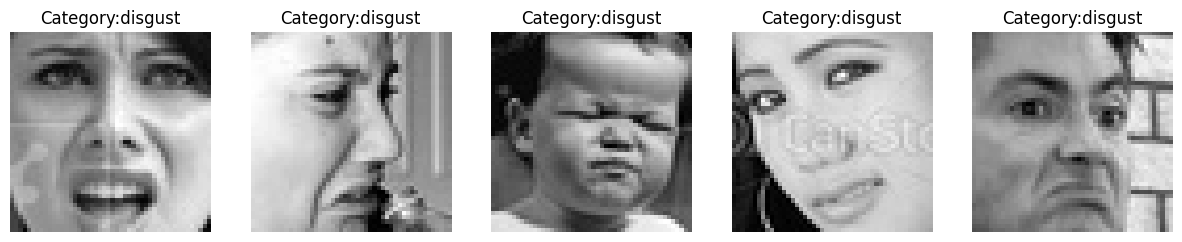

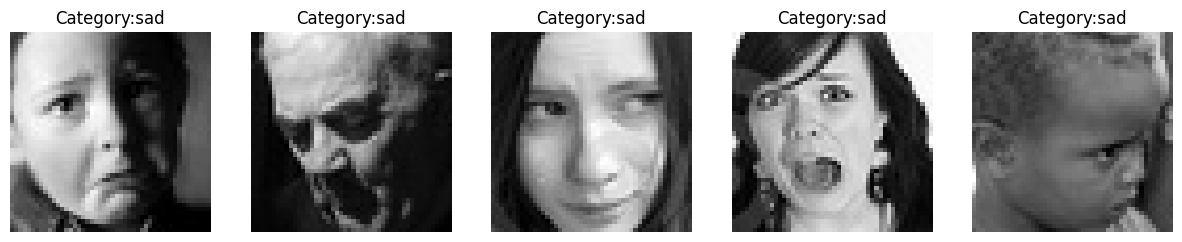

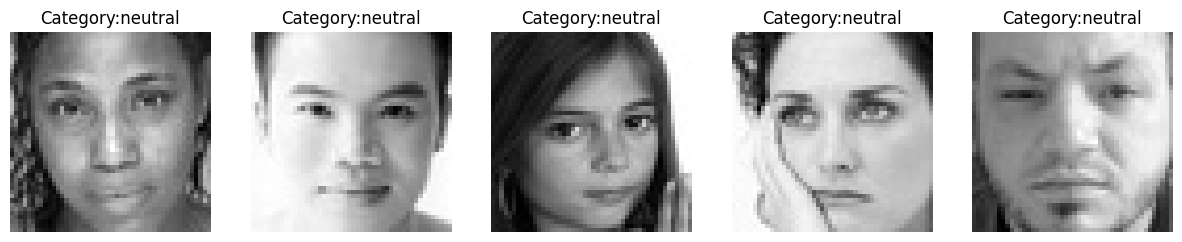

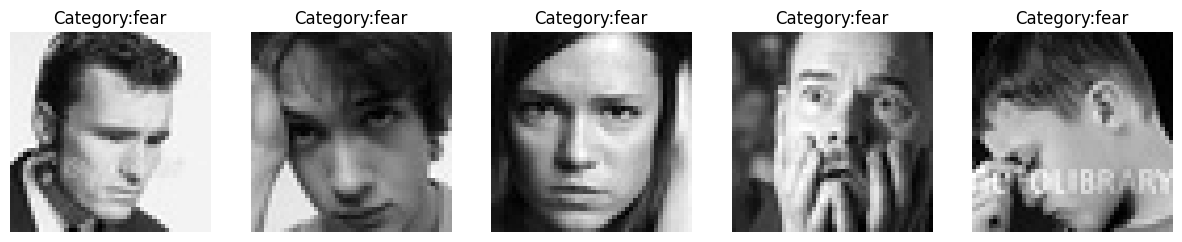

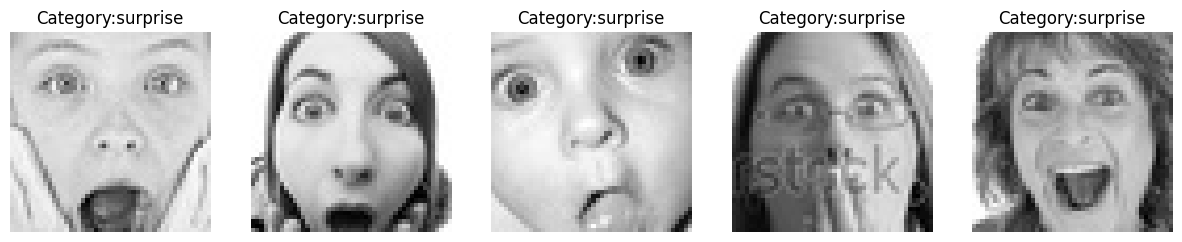

In [19]:
# Plotting the testing directory images
plotting_image(test_path)

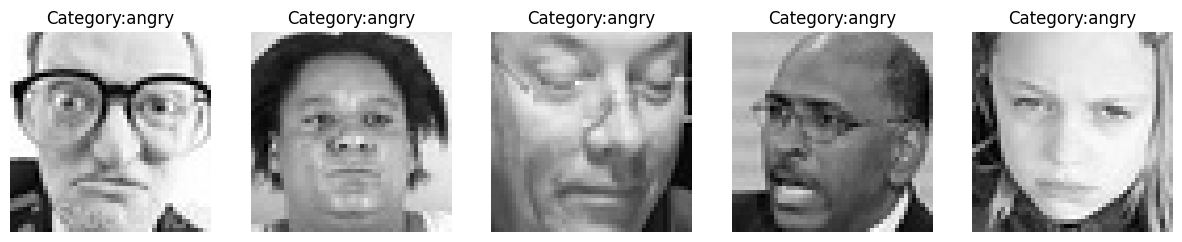

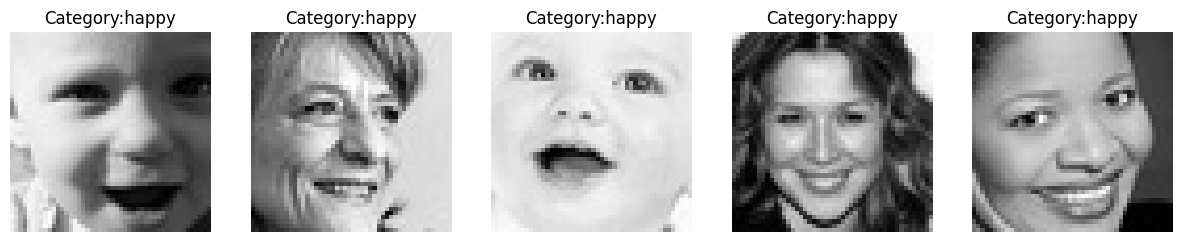

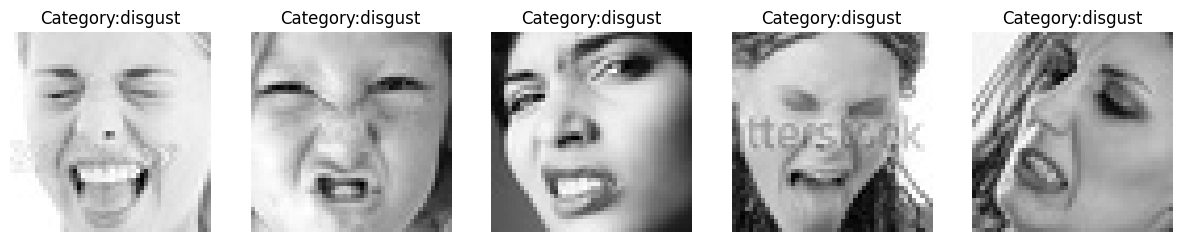

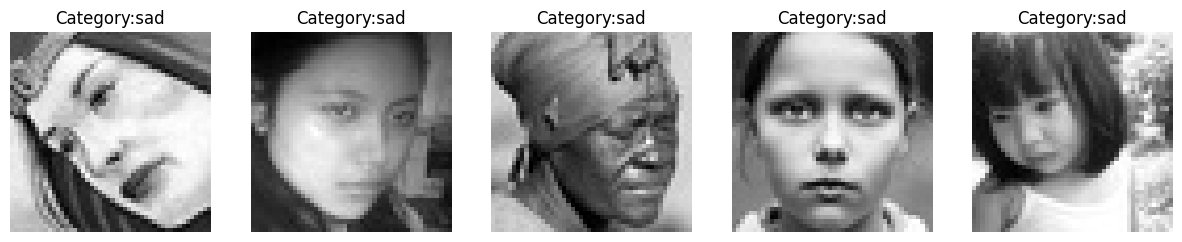

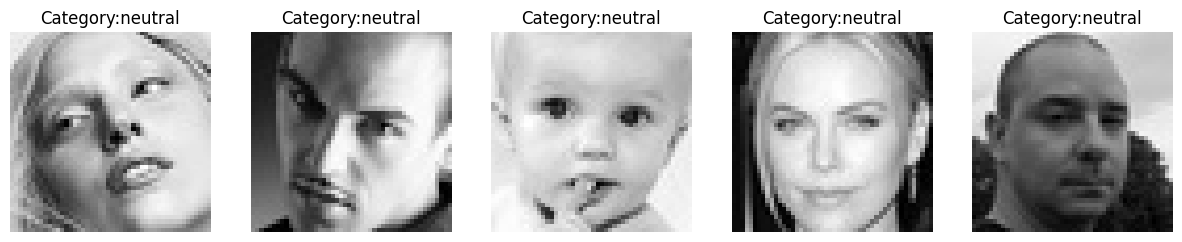

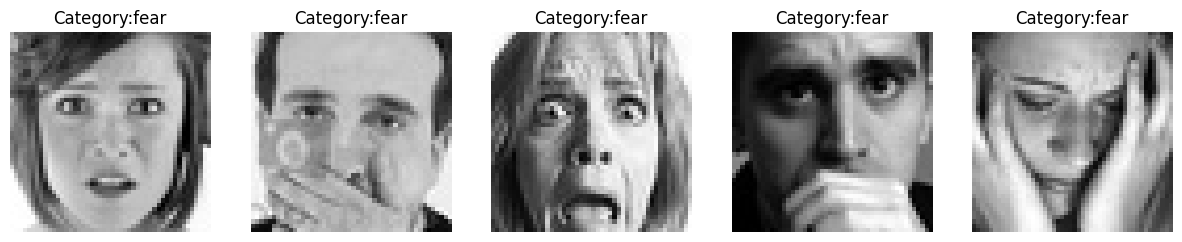

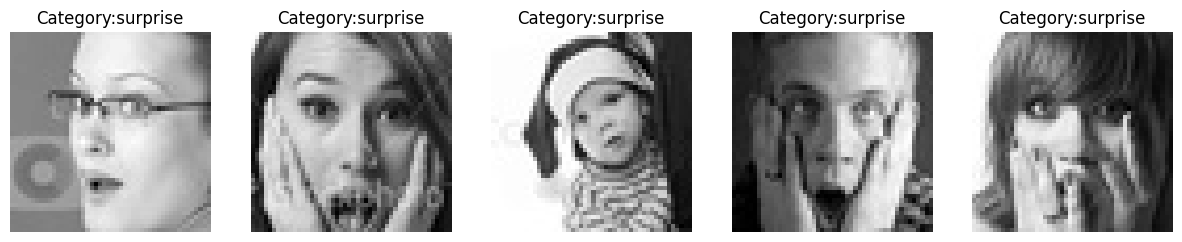

In [20]:
# # Plotting the Valid directory images
plotting_image(valid_path)

In [21]:
# Printing the height and wdith of images averages
def analysis_image(directory):
  widths = []
  heights = []
  for cate in os.listdir(directory):
    cat_path = os.path.join(directory, cate)

    for image_name in os.listdir(cat_path):
      img_path = os.path.join(cat_path,image_name)
      image = Image.open(img_path)
      width, height = image.size
      widths.append(width)
      heights.append(height)


    print(f"Average width of: {np.mean(widths)}, Avearge height: {np.mean(heights)}")
    print(f"Most Common Width: {Counter(widths).most_common(1)[0][0]}, Most common height:{Counter(heights).most_common(1)[0][0]}")
    plt.figure(figsize =(15,15))
    plt.subplot(1,2,1)
    plt.hist(widths, bins = 20, color = 'red', alpha =0.7)
    plt.title("Images Width Distribution")
    plt.subplot(1,2,2)
    plt.hist(heights, bins =20 , color = 'blue', alpha = 0.7)
    plt.title("Images Height Distribution")
    plt.show()

In [22]:
import cv2 as cv

In [23]:
# Finding the duplicates in the images on both directories
import os
import cv2
from hashlib import md5

def find_duplicates(directory):
    hashes = {}
    duplicates = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff')):
                file_path = os.path.join(root, file)
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    # Resize the image to a consistent size
                    resized_img = cv2.resize(img, (128, 128))  # Adjust size if needed

                    # Compute the hash of the image
                    img_hash = md5(resized_img).hexdigest()

                    # Check if this hash already exists
                    if img_hash in hashes:
                        duplicates.append((hashes[img_hash], file_path))
                    else:
                        hashes[img_hash] = file_path

    return duplicates




In [24]:
dup_train = find_duplicates(train_path)
dup_valid = find_duplicates(valid_path)
dup_test = find_duplicates(test_path)

In [25]:
print(f'Found {len(dup_train)} duplicate pairs:')
for original, duplicate in dup_train:
    print(f'Duplicate found: {duplicate} is a duplicate of {original}')

Found 815 duplicate pairs:
Duplicate found: /content/train/angry/Training_74978516.jpg is a duplicate of /content/train/angry/Training_55191373.jpg
Duplicate found: /content/train/angry/Training_11749309.jpg is a duplicate of /content/train/angry/Training_48679836.jpg
Duplicate found: /content/train/angry/Training_67671985.jpg is a duplicate of /content/train/angry/Training_92439792.jpg
Duplicate found: /content/train/angry/Training_37752731.jpg is a duplicate of /content/train/angry/Training_67283529.jpg
Duplicate found: /content/train/angry/Training_44516923.jpg is a duplicate of /content/train/angry/Training_96244299.jpg
Duplicate found: /content/train/angry/Training_70392303.jpg is a duplicate of /content/train/angry/Training_43519334.jpg
Duplicate found: /content/train/angry/Training_61905254.jpg is a duplicate of /content/train/angry/Training_47220126.jpg
Duplicate found: /content/train/angry/Training_39394836.jpg is a duplicate of /content/train/angry/Training_98328519.jpg
Dupli

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


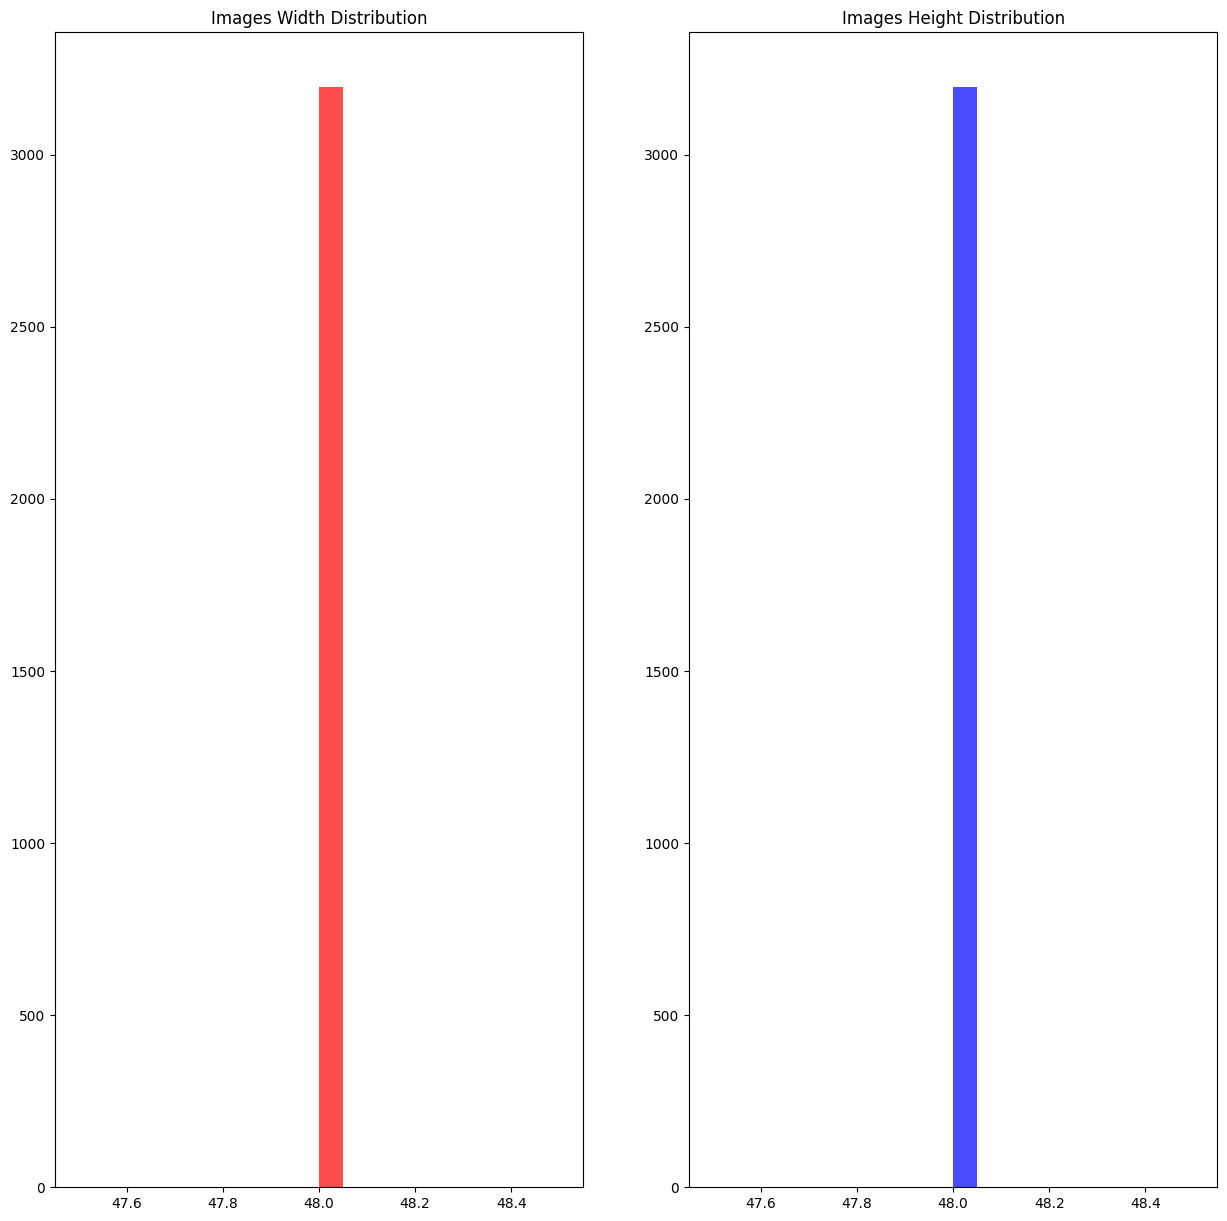

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


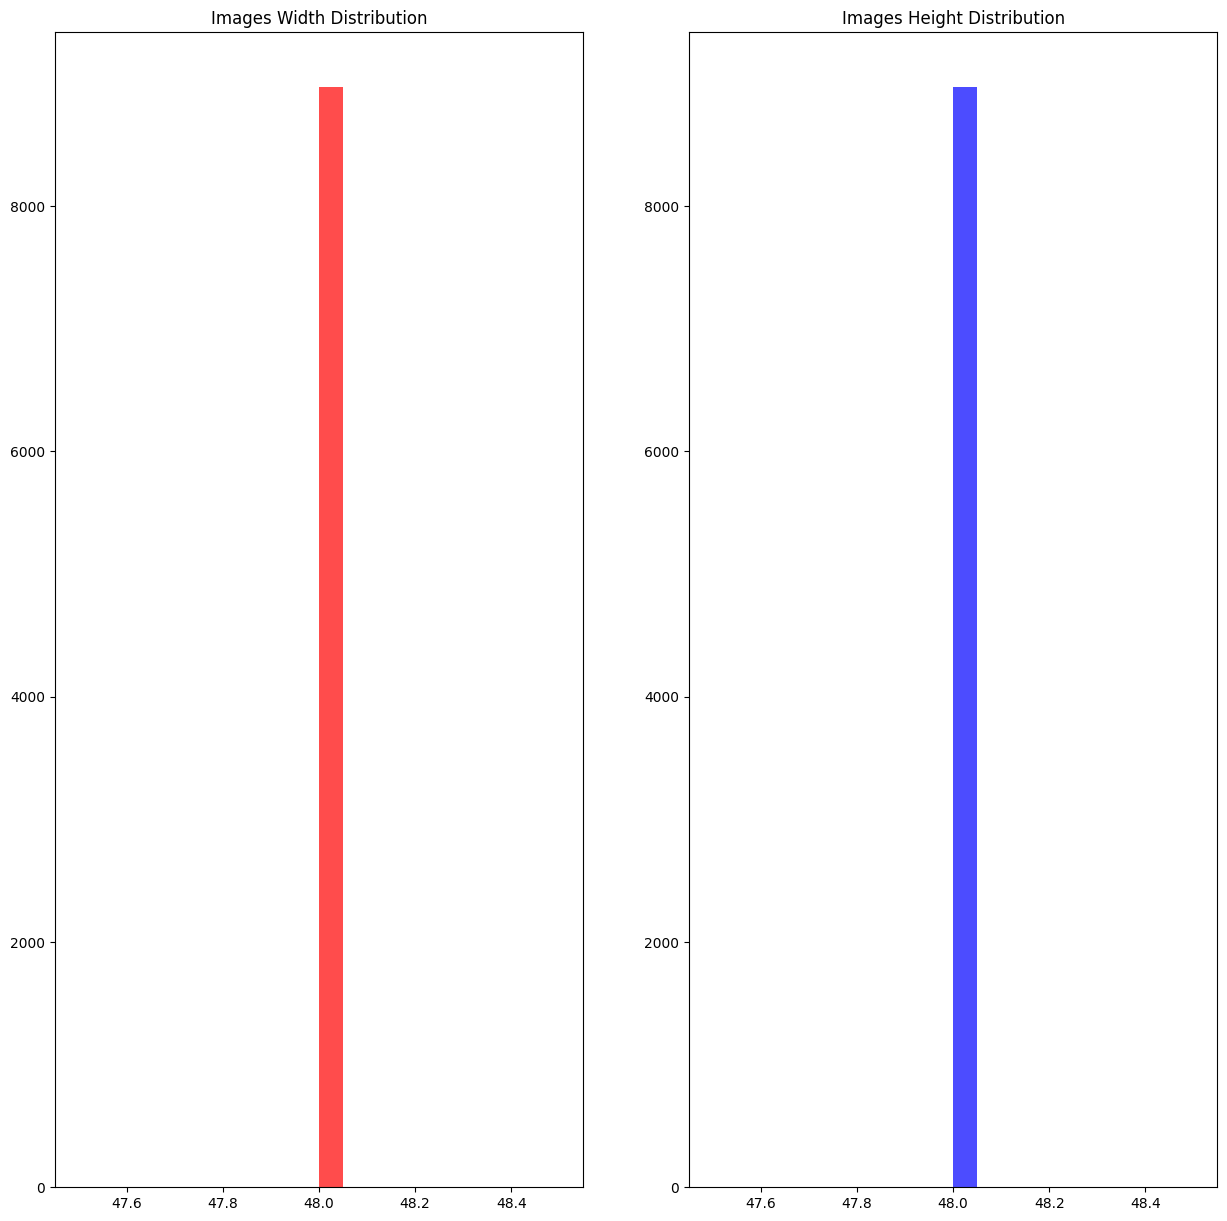

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


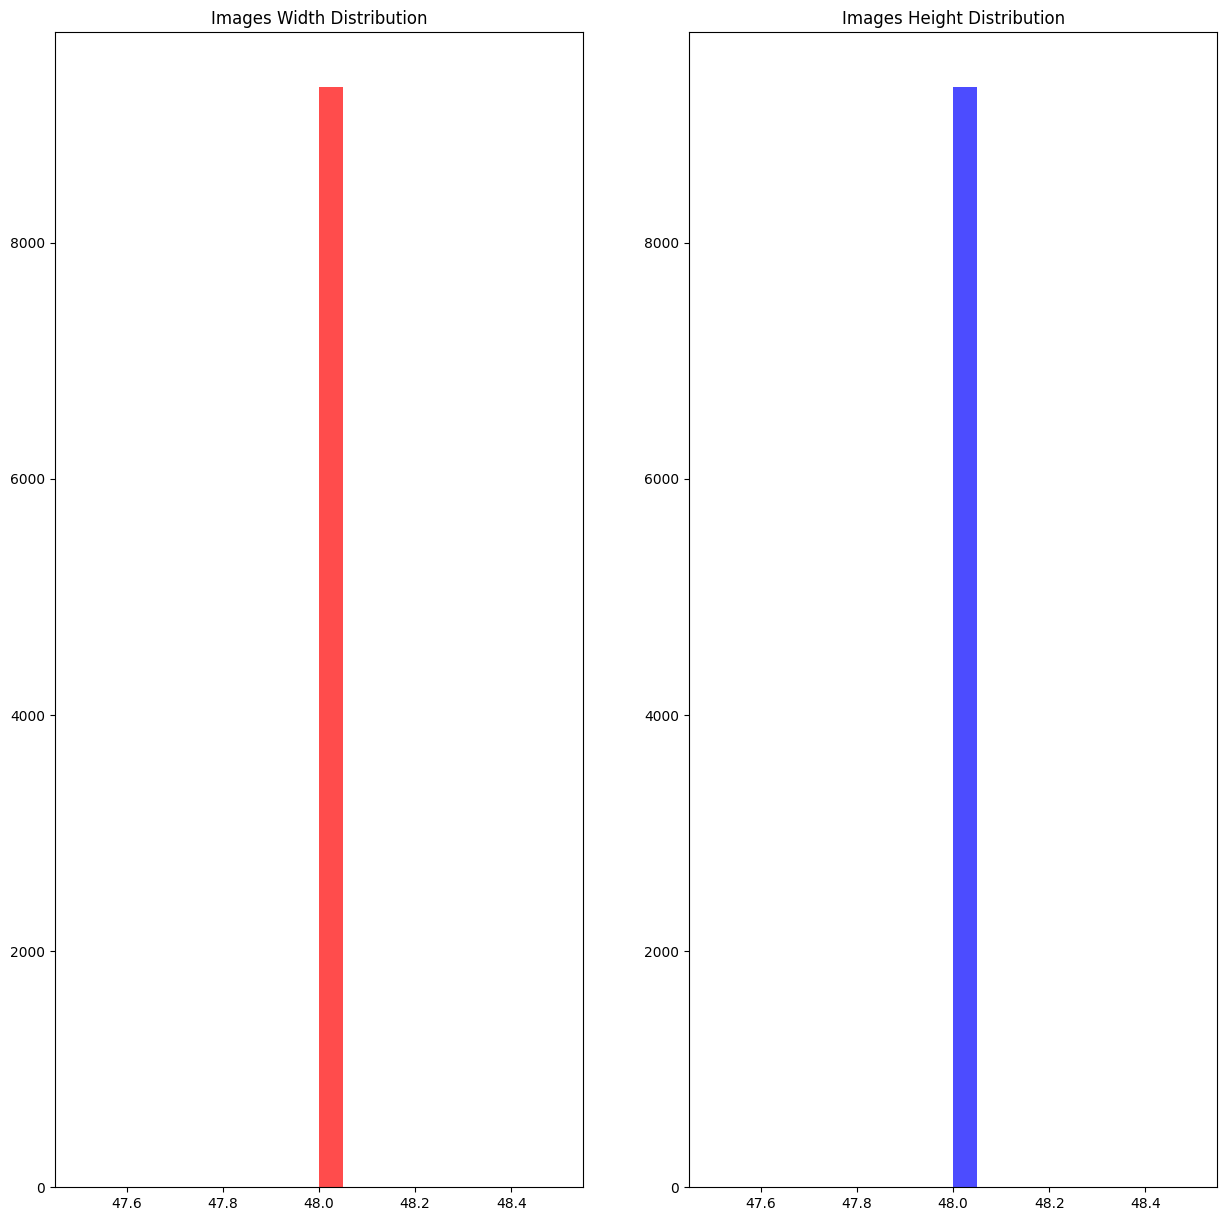

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


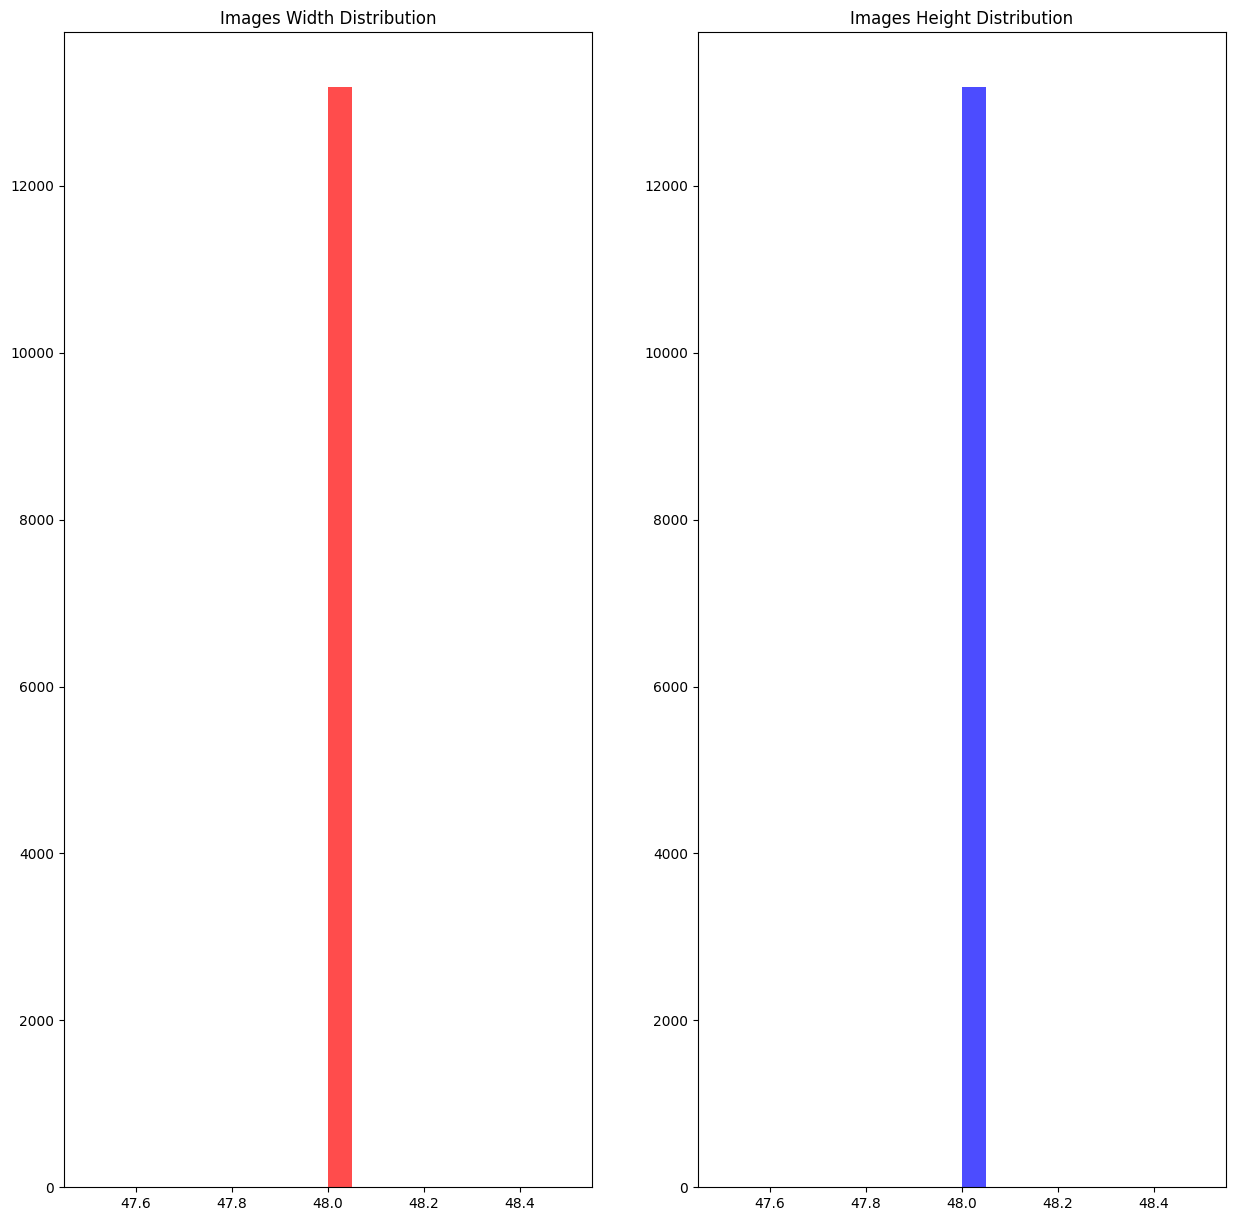

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


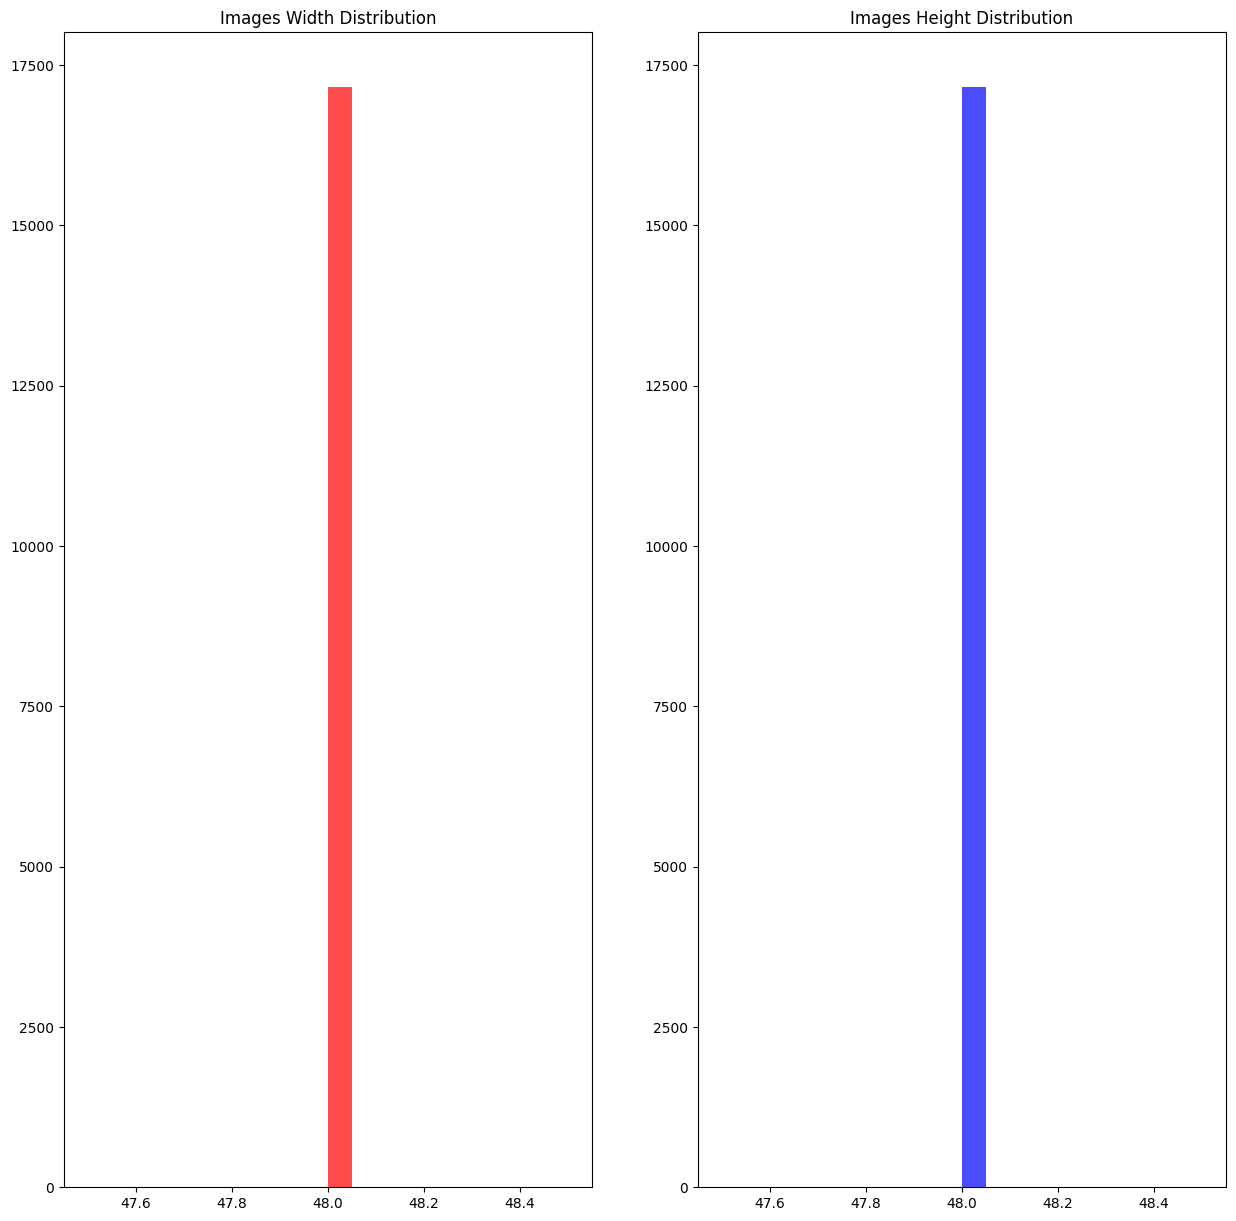

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


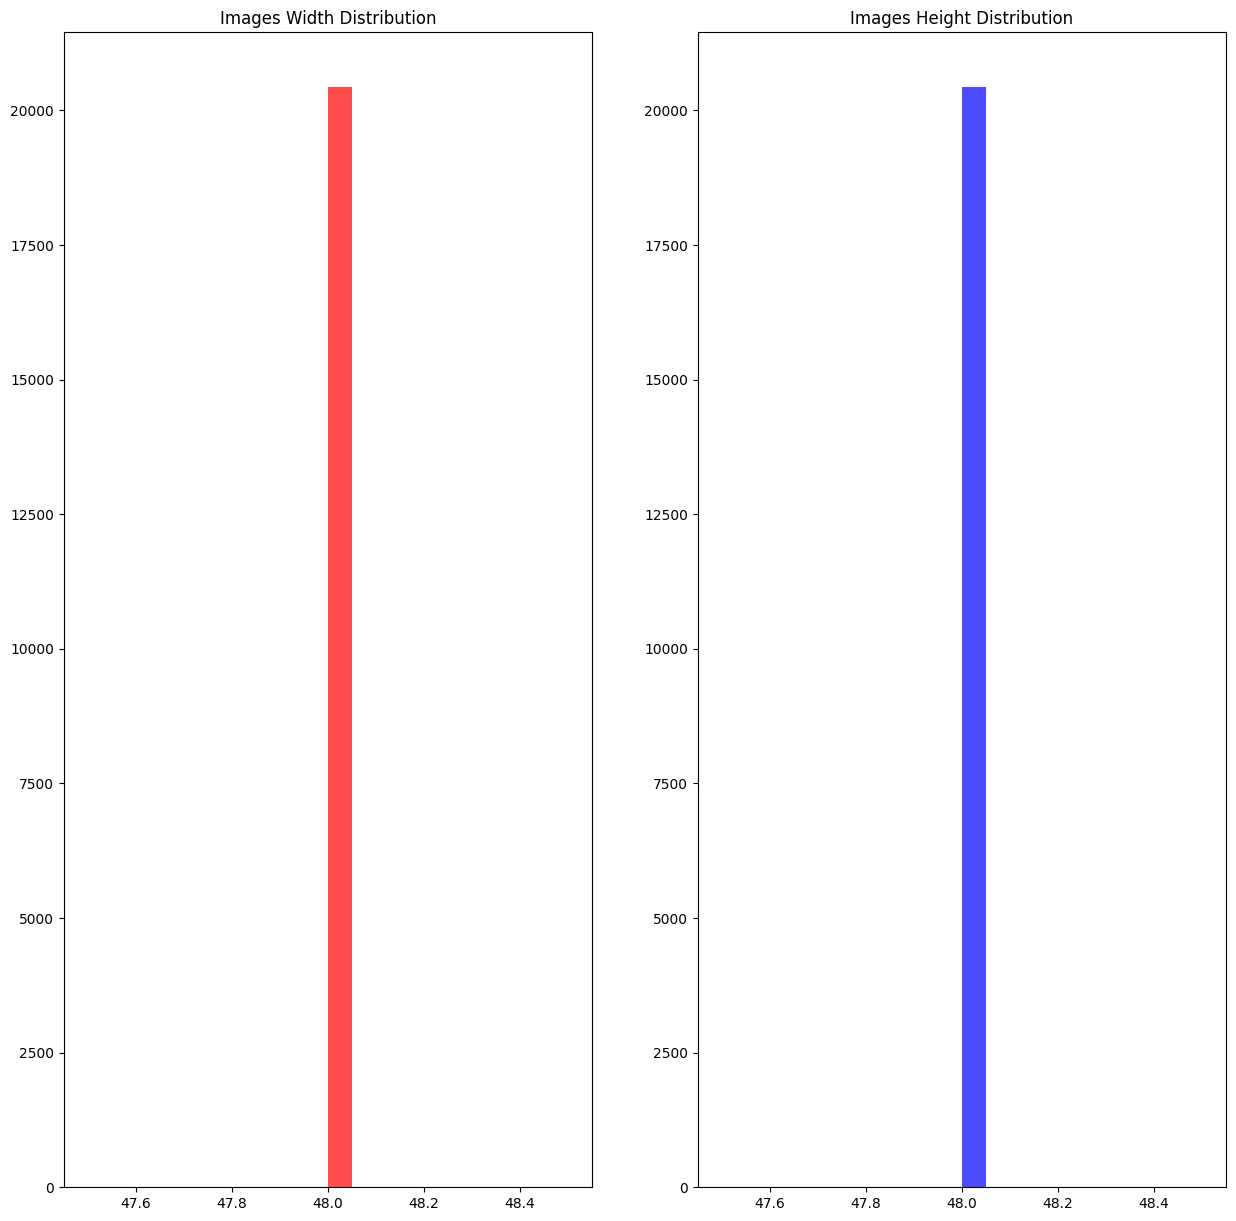

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


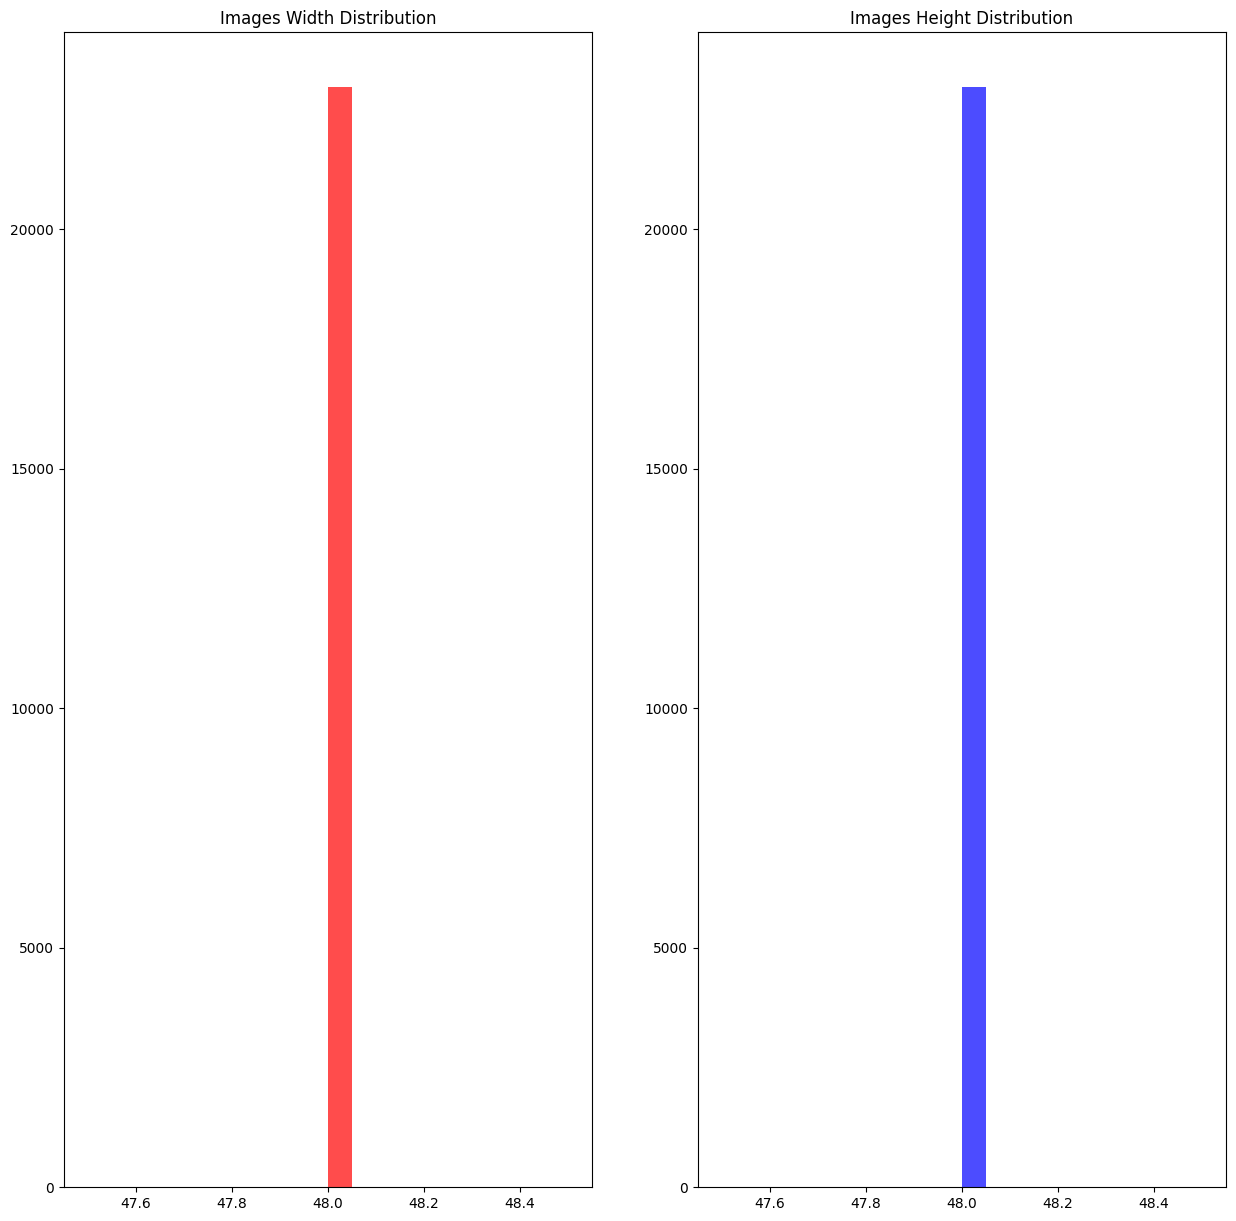

In [26]:
analysis_image(train_path)

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


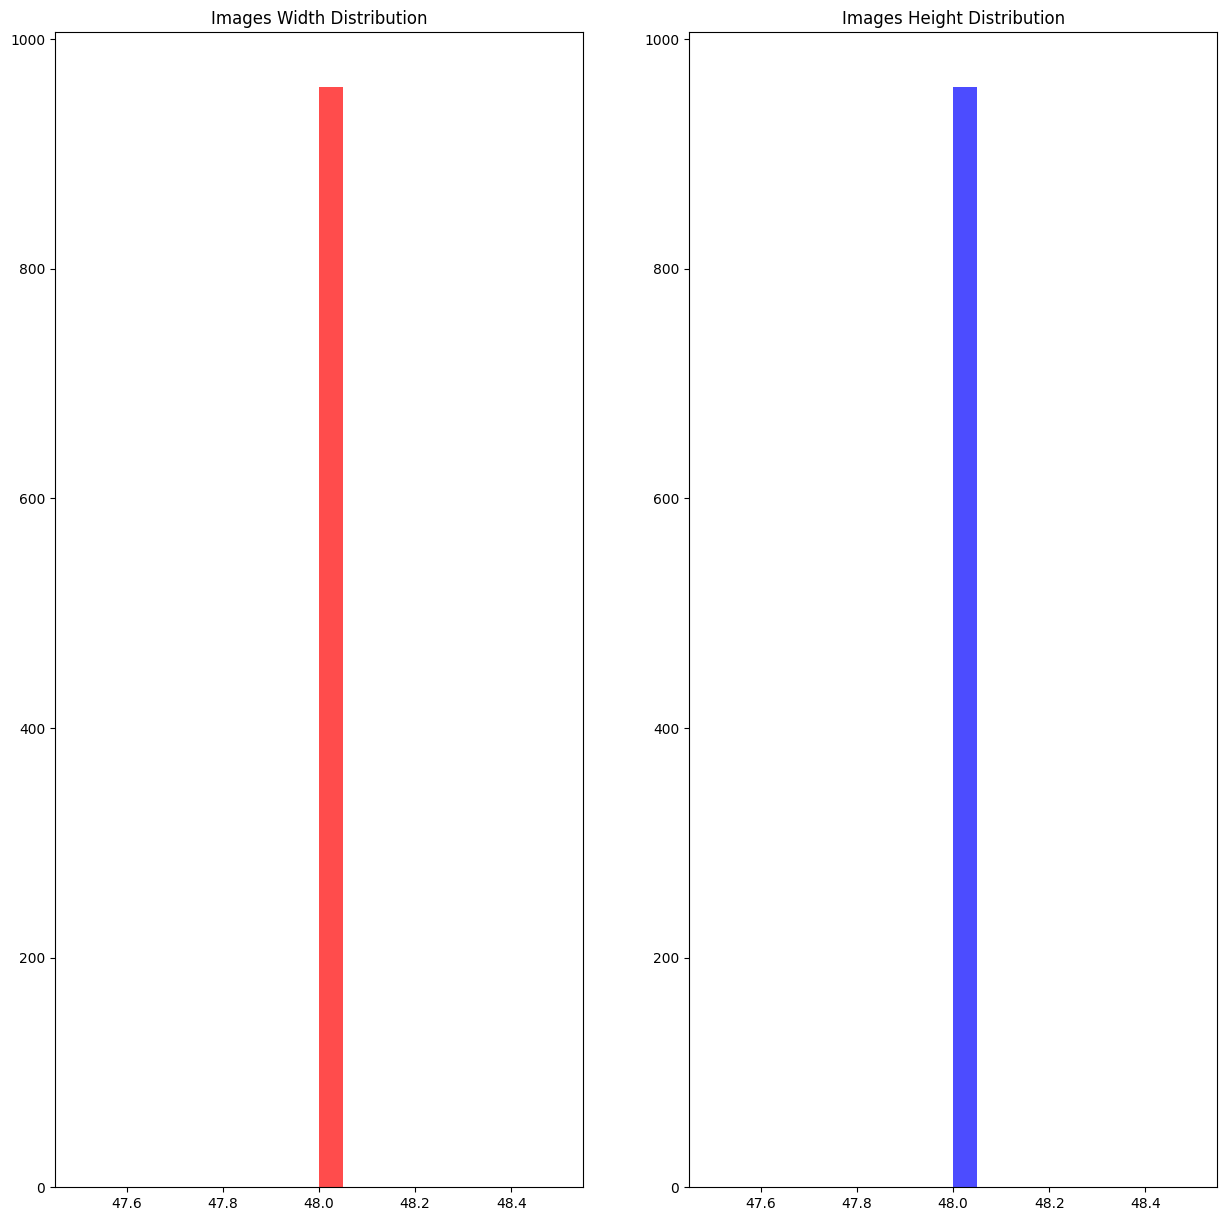

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


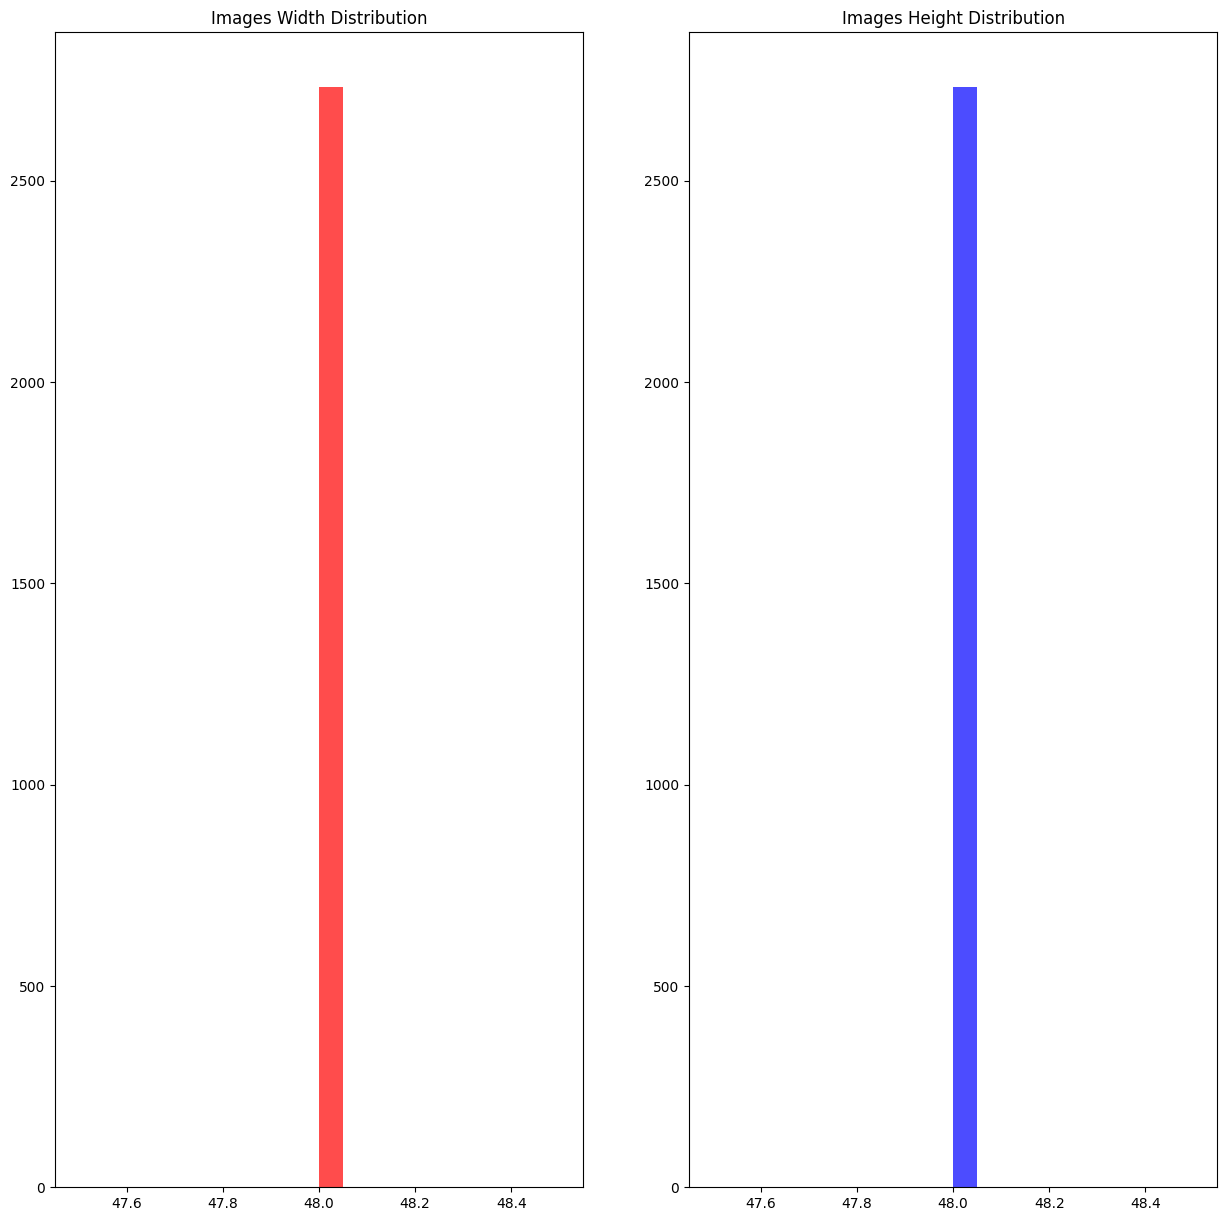

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


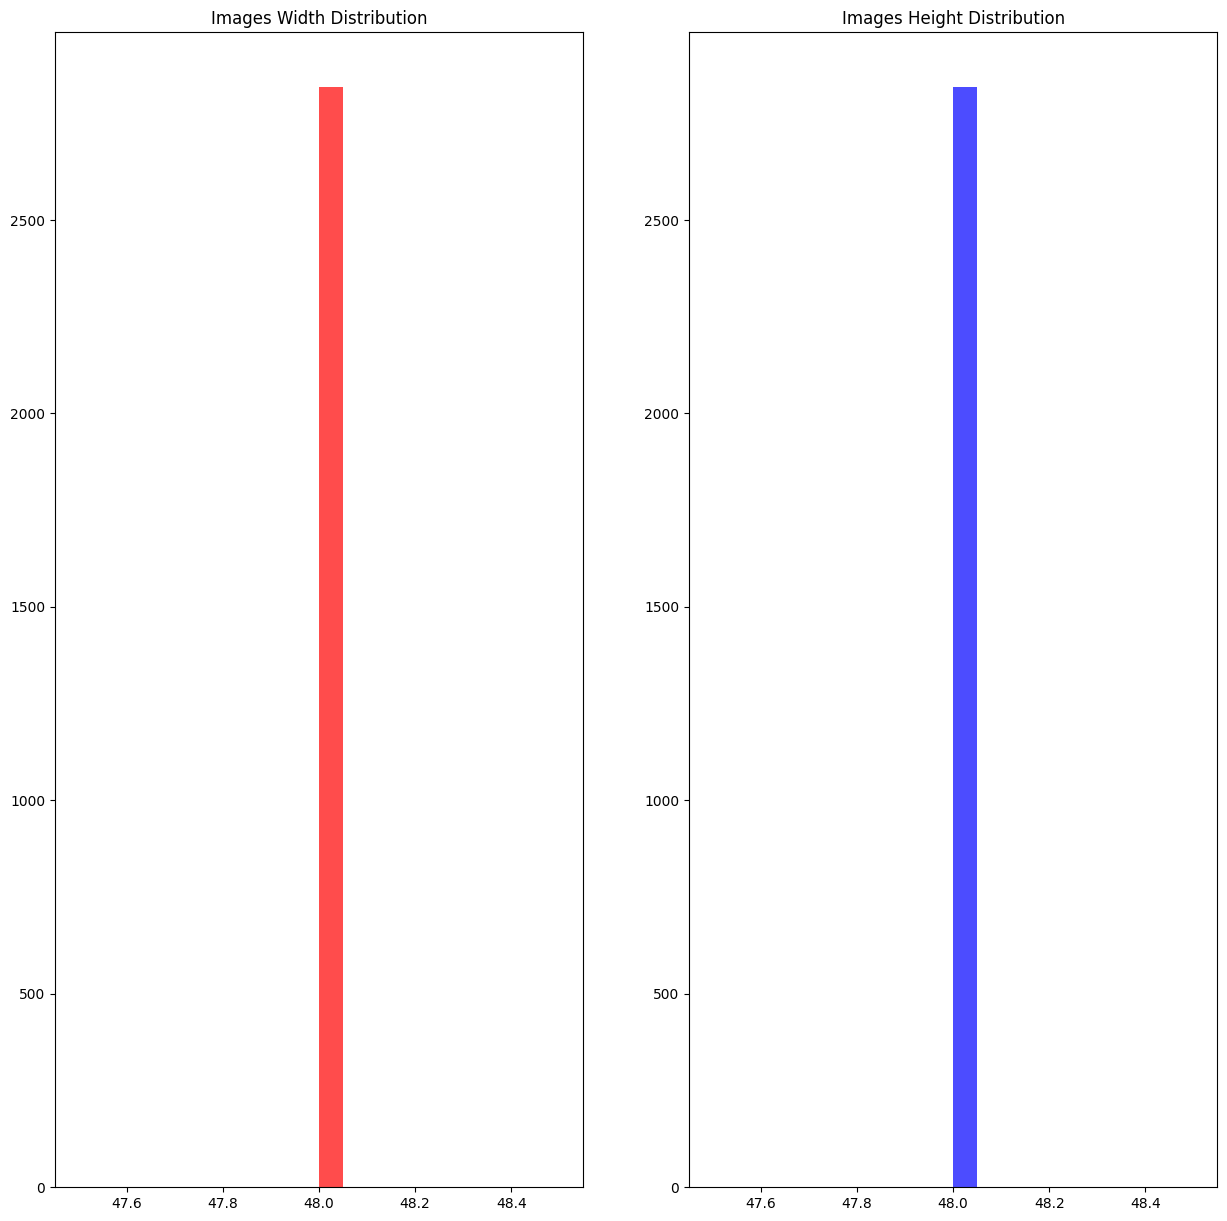

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


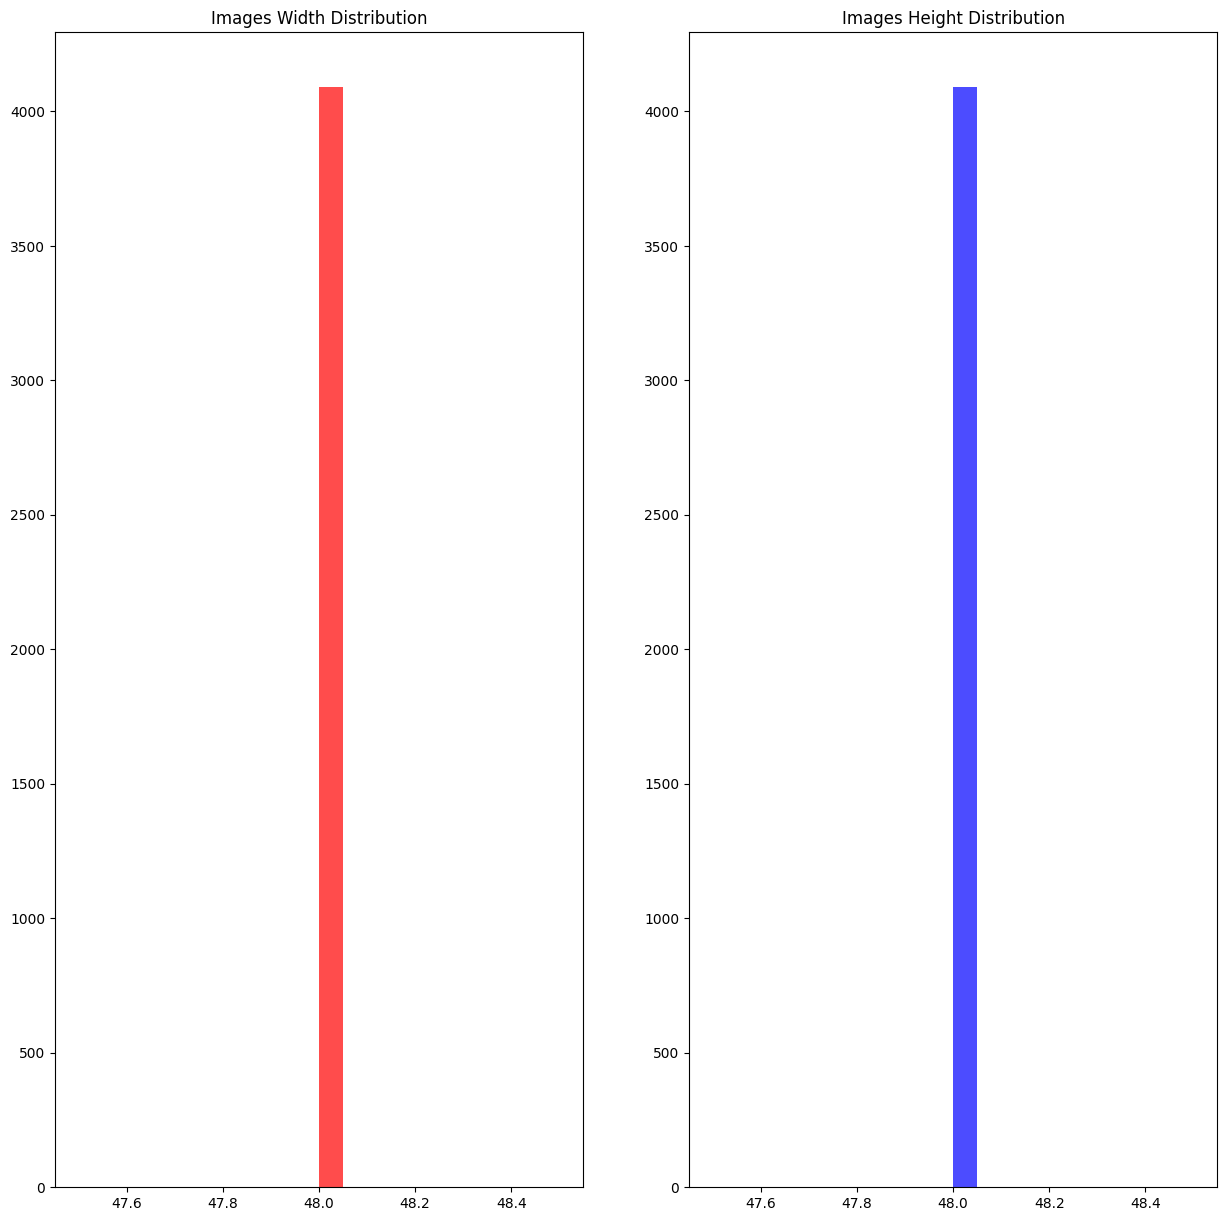

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


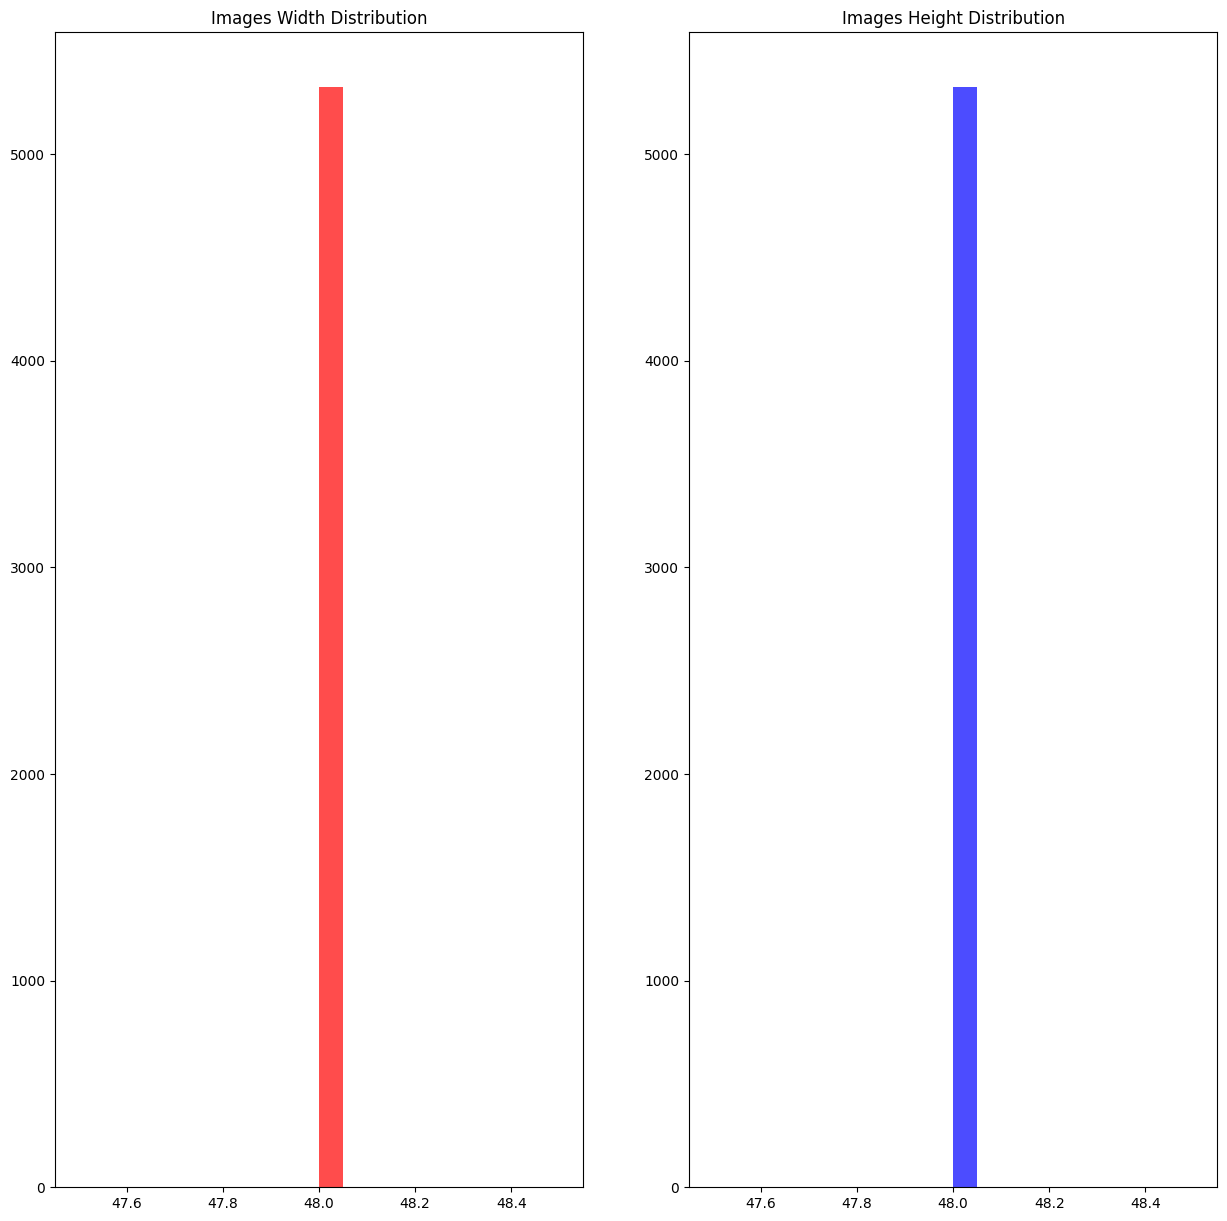

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


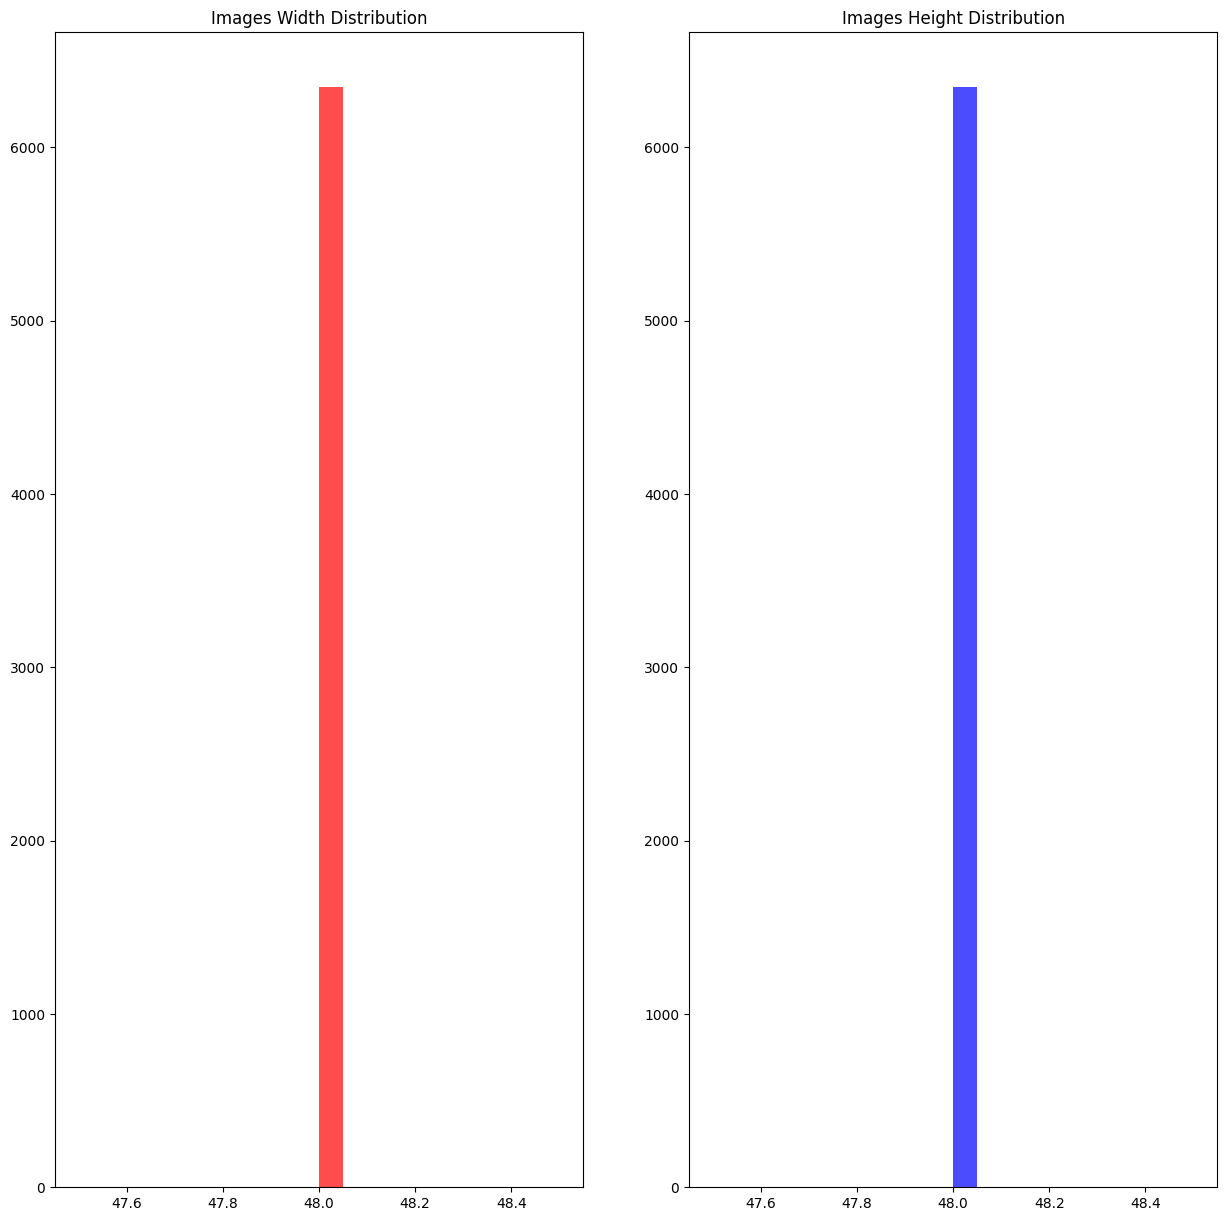

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


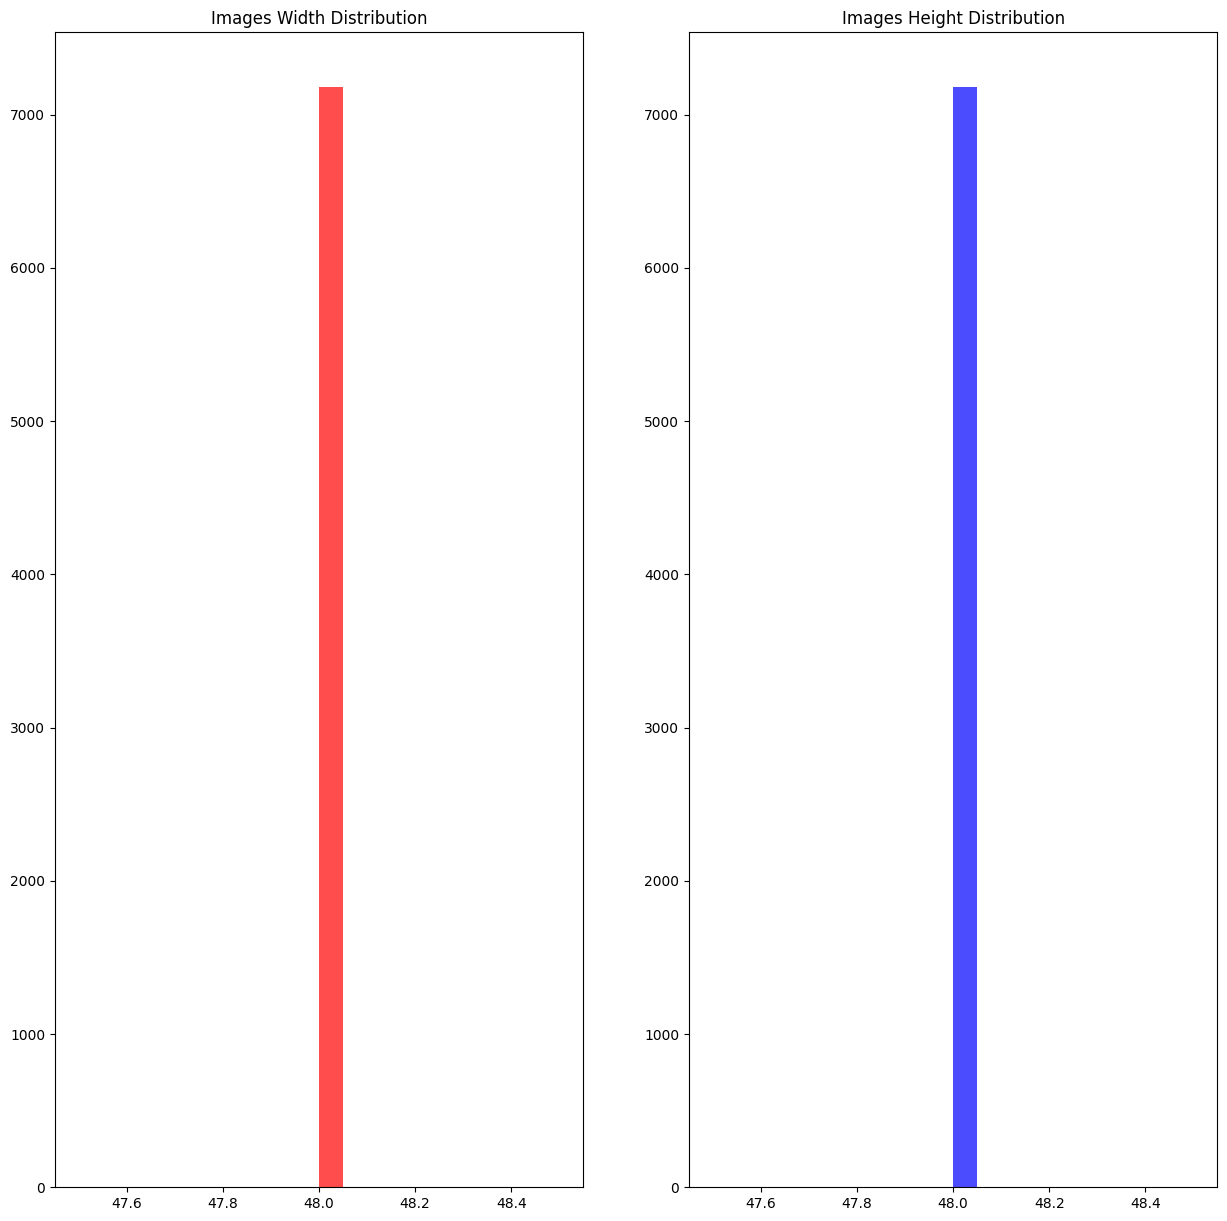

In [27]:
analysis_image(test_path)

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


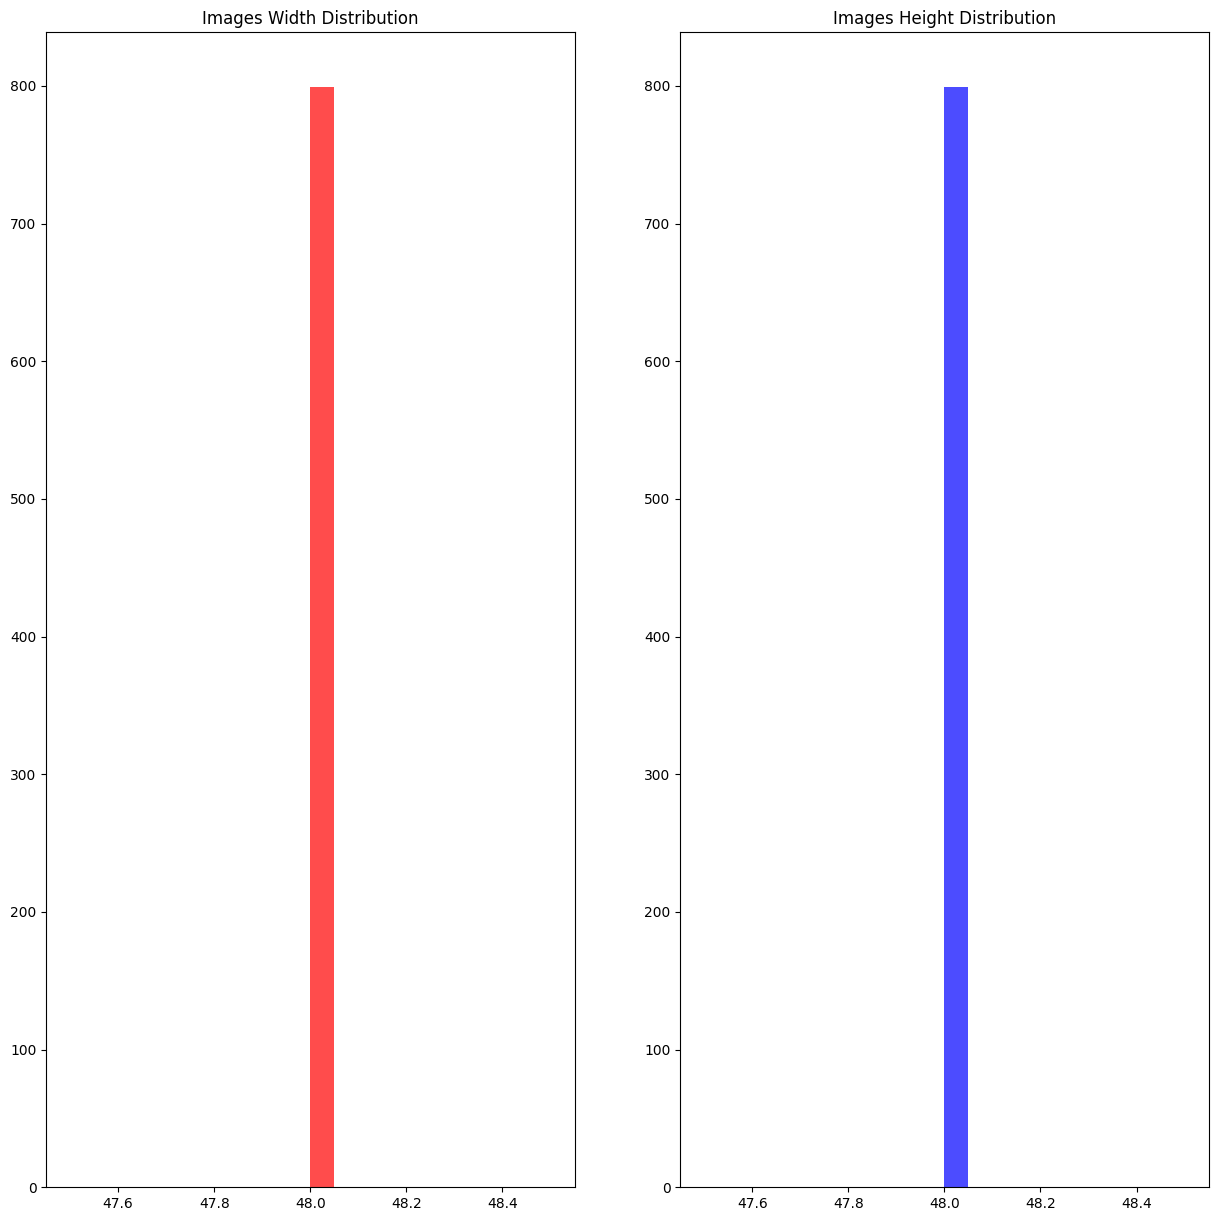

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


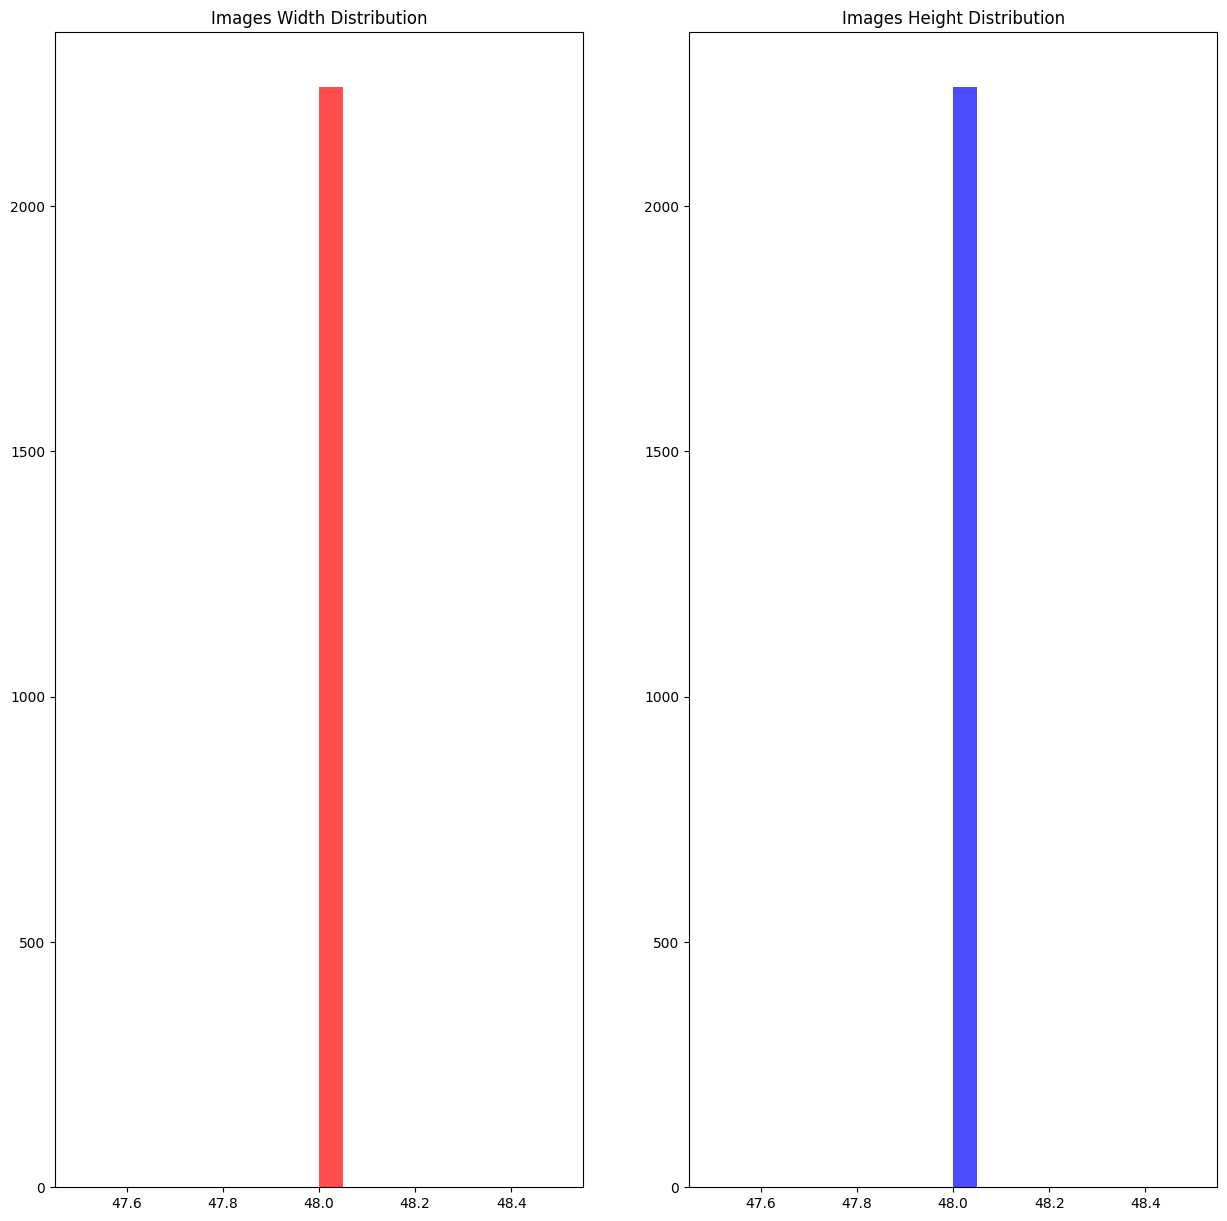

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


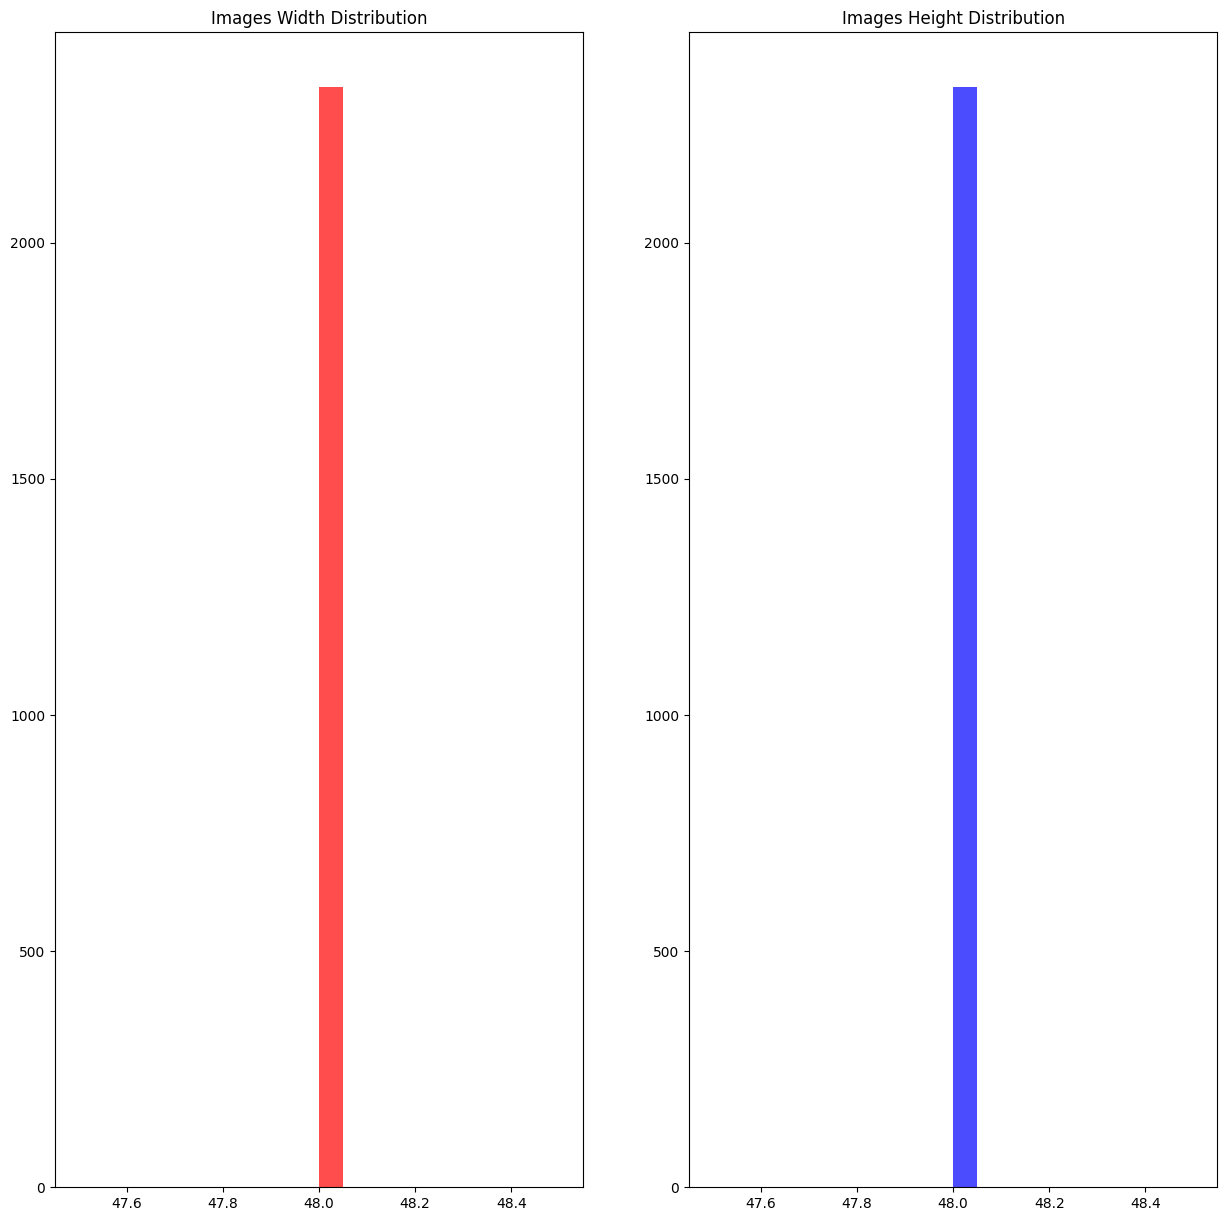

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


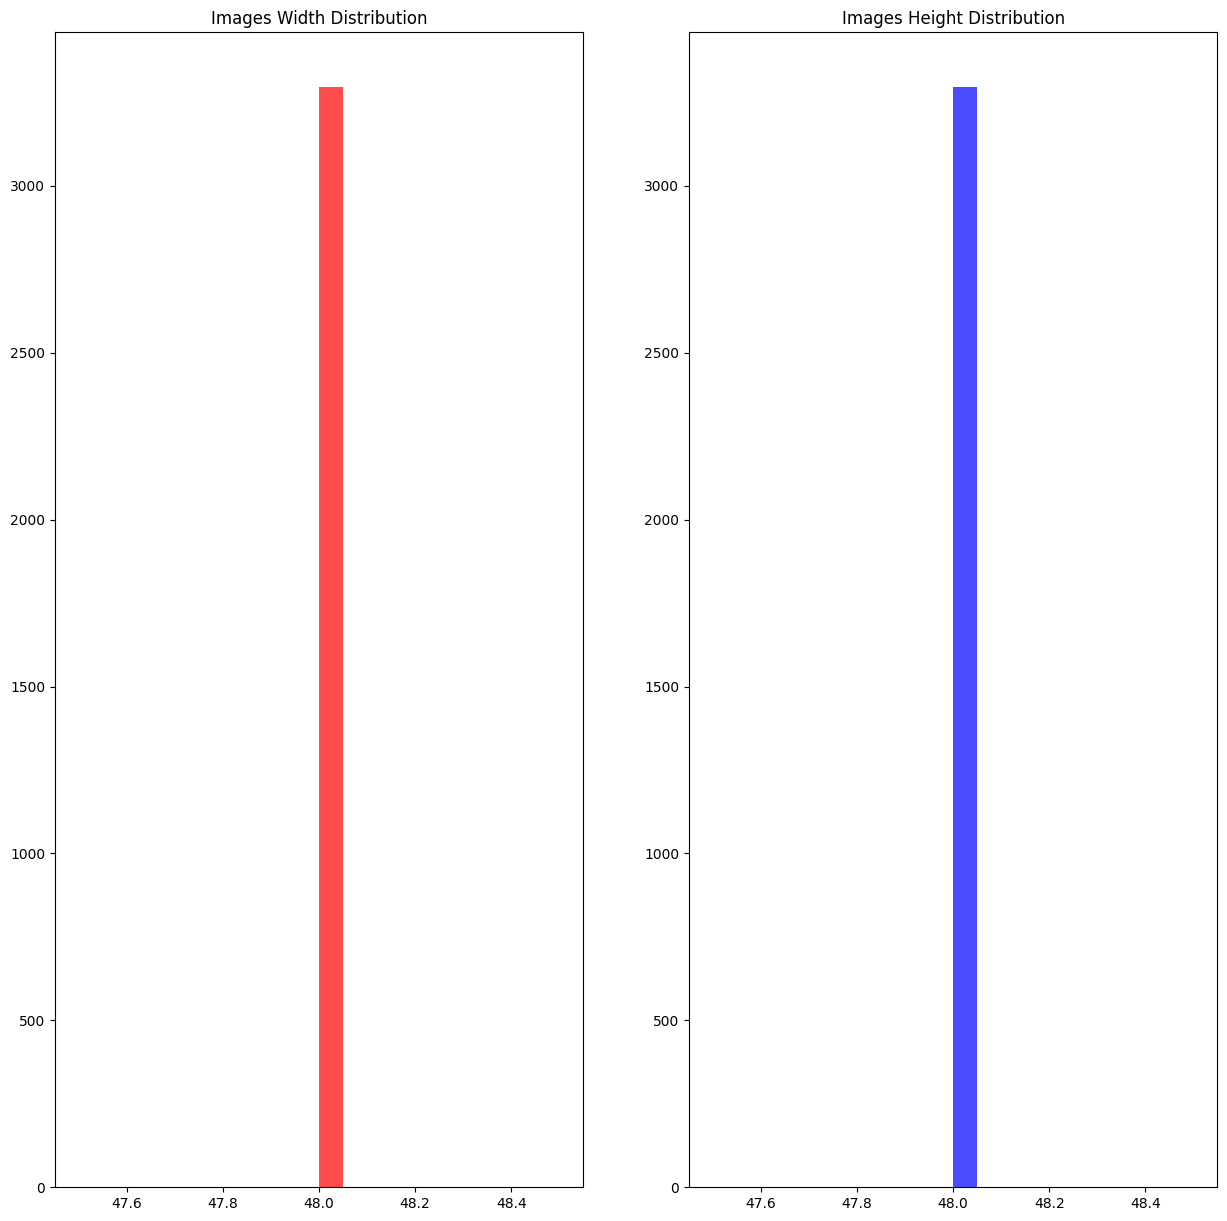

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


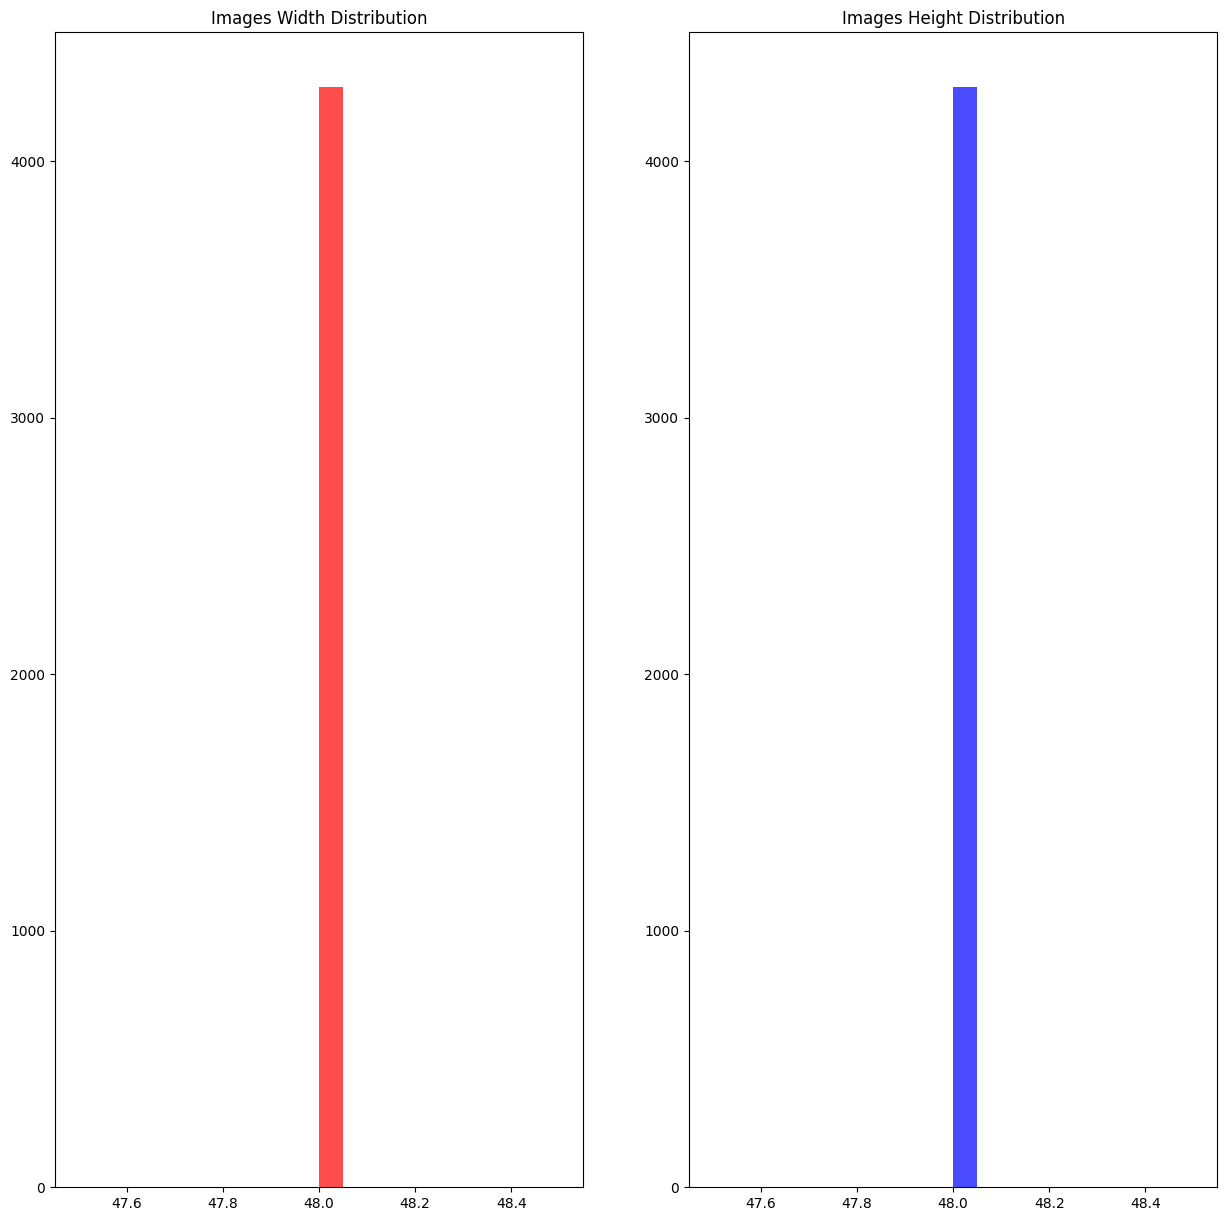

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


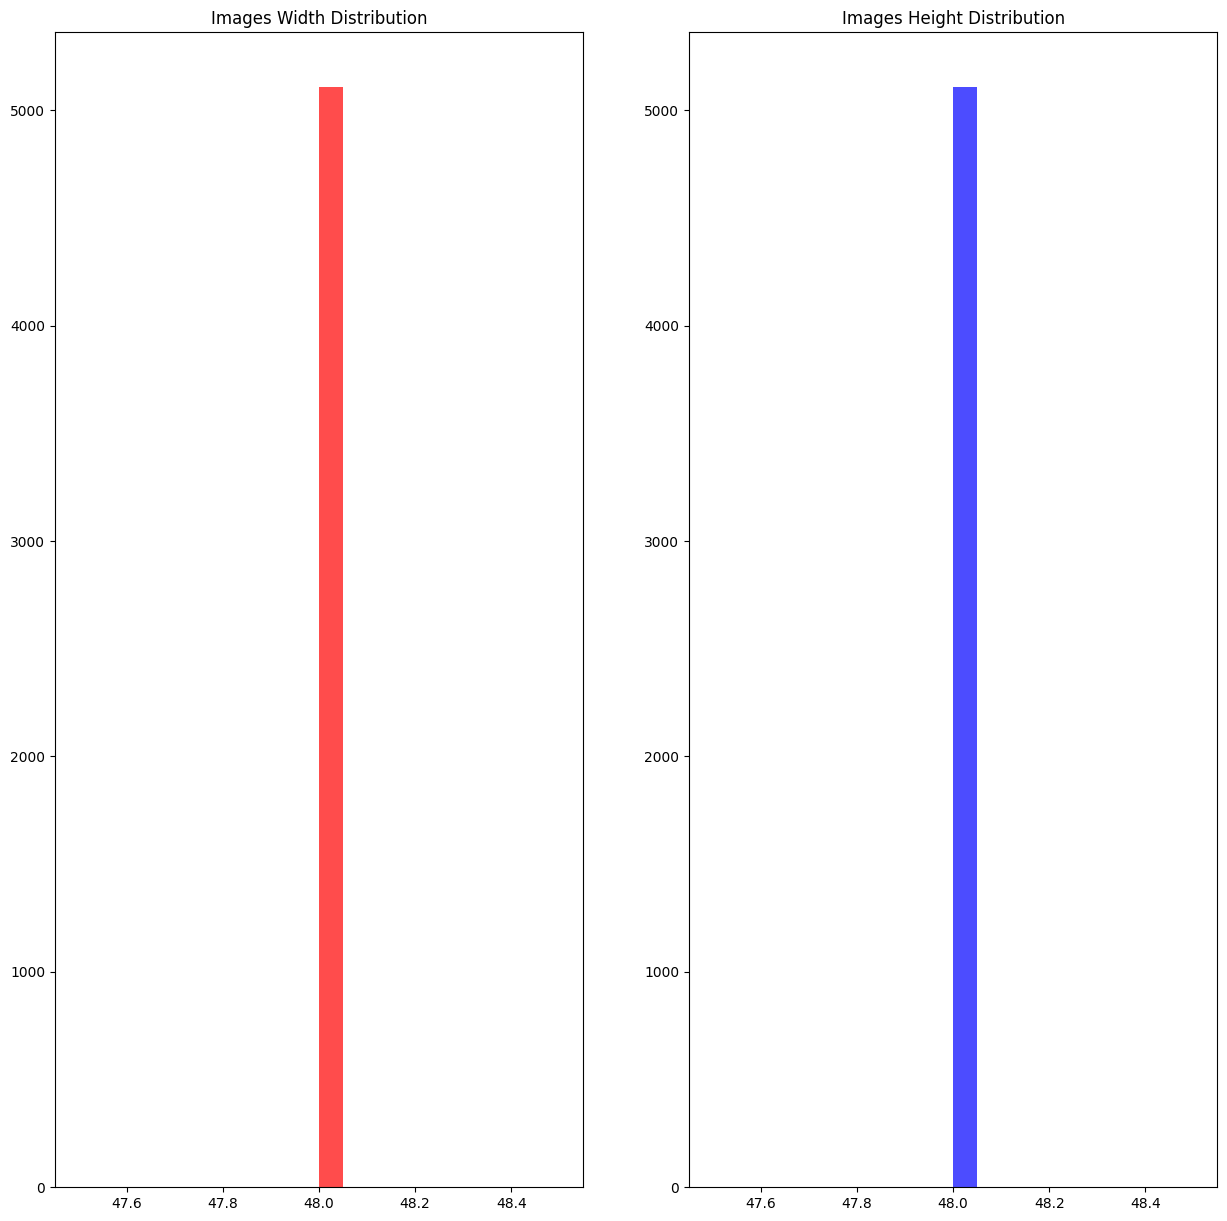

Average width of: 48.0, Avearge height: 48.0
Most Common Width: 48, Most common height:48


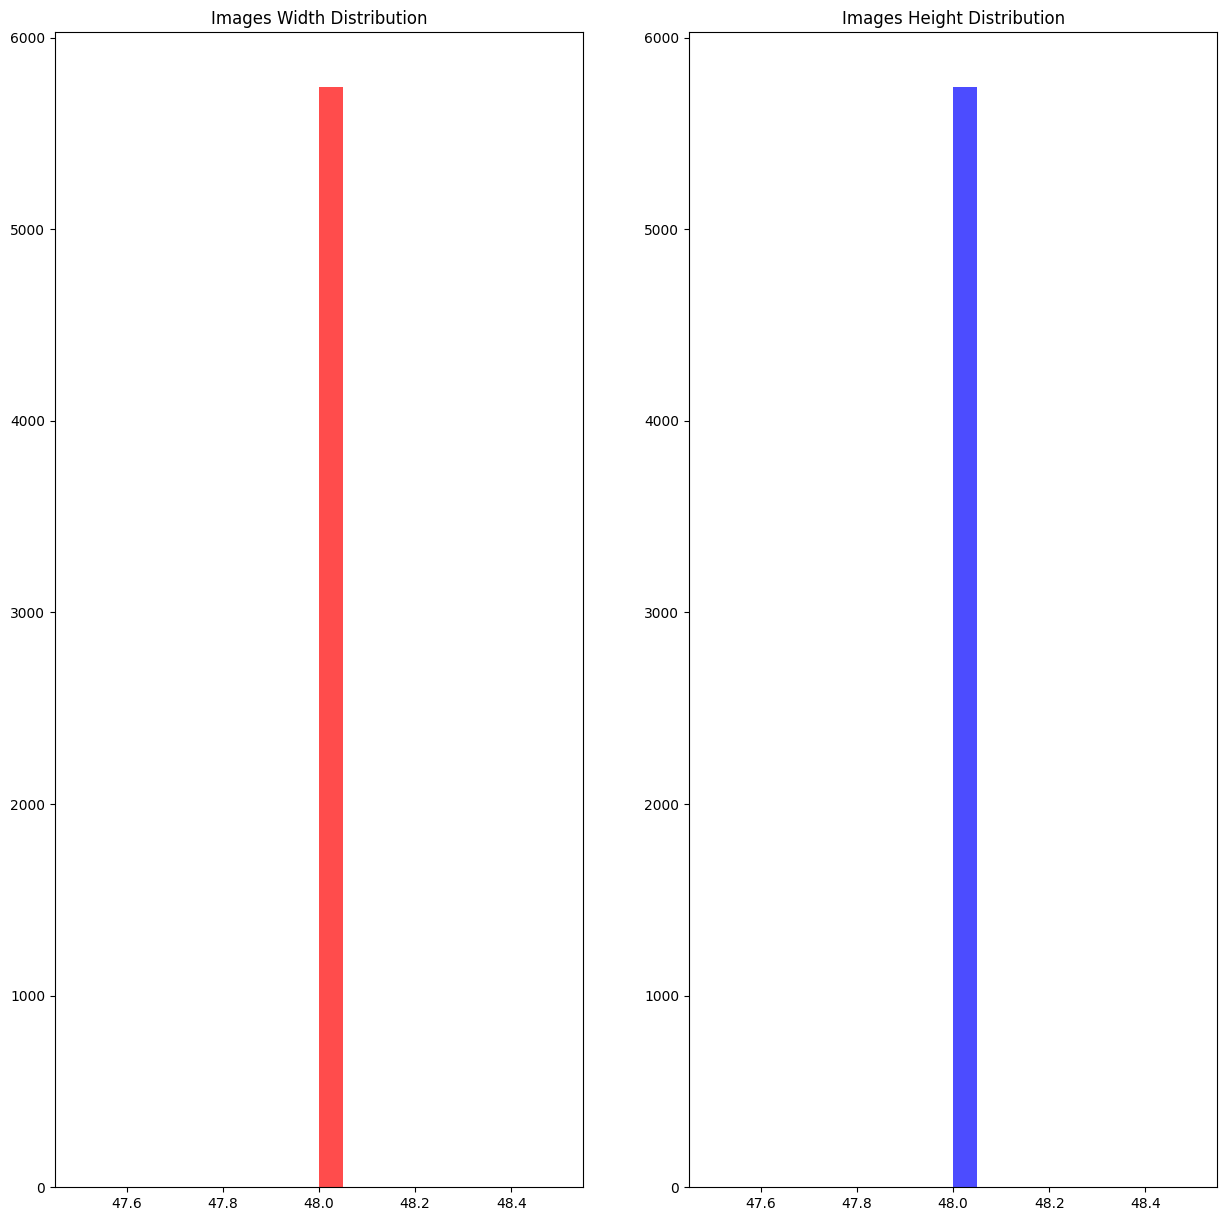

In [28]:
analysis_image(valid_path)

**Data Preprocessing**
For Image data Image augmentation, normalization, flipping, rotate, resizing frames, splitting is done

In [29]:
# Data Augmentation and Normalization for training session
train_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',

)
valid_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',

)


test_gen = ImageDataGenerator(
    rescale = 1./255
)

In [30]:
# Training data with augmentation
train_generation = train_gen.flow_from_directory(
    train_path,
    target_size = (48,48),
    color_mode = 'grayscale',
    batch_size = 64,
    class_mode = 'categorical',

    shuffle = True
)
# Validation data with augementation taken 20% from the training set
# Validation data with augementation taken 20% from the training set
valid_generation = valid_gen.flow_from_directory(
    valid_path,
    target_size = (48,48),
    color_mode = 'grayscale',
    batch_size = 64,
    class_mode = 'categorical',

)

# Test Data with augmentation
test_generation = test_gen.flow_from_directory(
  test_path,
  target_size = (48,48),
  color_mode = 'grayscale',
  batch_size = 64,
  class_mode = 'categorical',
  shuffle = False
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Model Building**

In [40]:
# Creating the metrics and loading important models layers
from keras.models import Sequential , Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Bidirectional, LSTM, Reshape, Activation, Input
opt = Adam(learning_rate = 0.0001)
met = [CategoricalAccuracy(name = 'Accuracy'), Precision(name = 'Preicsion'), Recall(name = 'Recall'), F1Score(name = 'F1-score')]

In [41]:
# six player CNN model
model  = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))

model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,639 (1.61 MB)

 Trainable params: 421,639 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer = Adam(learning_rate= 0.001), loss = 'categorical_crossentropy', metrics = met)

In [43]:
history = model.fit(train_generation, validation_data = valid_generation, epochs = 70)

Epoch 1/70
359/359 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - Accuracy: 0.2459 - F1-score: 0.0872 - Preicsion: 0.0341 - Recall: 1.4455e-05 - loss: 1.8211 - val_Accuracy: 0.2660 - val_F1-score: 0.1082 - val_Preicsion: 0.5000 - val_Recall: 5.2256e-04 - val_loss: 1.7632
Epoch 2/70
359/359 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - Accuracy: 0.2838 - F1-score: 0.1830 - Preicsion: 0.5396 - Recall: 0.0089 - loss: 1.7380 - val_Accuracy: 0.3327 - val_F1-score: 0.2335 - val_Preicsion: 0.6319 - val_Recall: 0.0200 - val_loss: 1.6810
Epoch 3/70
359/359 ━━━━━━━━━━━━━━━━━━━━ 40s 62ms/step - Accuracy: 0.3388 - F1-score: 0.2390 - Preicsion: 0.6389 - Recall: 0.0545 - loss: 1.6545 - val_Accuracy: 0.3670 - val_F1-score: 0.2646 - val_Preicsion: 0.7041 - val_Recall: 0.0874 - val_loss: 1.5901
Epoch 4/70
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - Accuracy: 0.3854 - F1-score: 0.2834 - Preicsion: 0.6776 - Recall: 0.1202 - loss: 1.5804 - val_Accuracy: 0.4135 - val_F1-score: 0.3137 - val_Preicsion: 0.7237 - val_Recall: 0.

In [44]:
from google.colab import drive

In [45]:
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
model.save('/content/drive/MyDrive/Athesham_dataset/fer_Athessham_model.h5')

In [47]:
convert =  tf.lite.TFLiteConverter.from_keras_model(model)

In [48]:
tf_lite = convert.convert()

Saved artifact at '/tmp/tmpnisqgri_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name='keras_tensor_134')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  135650595518976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135650595504544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135650595517744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135650595520208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135650551457472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135650551461168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135650591511248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135650591520224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135650594404688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135650594395360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135650594398

In [49]:
with open('/content/drive/MyDrive/Athesham_dataset/fer_Athessham_model.tflite', 'wb') as f:
  f.write(tf_lite)

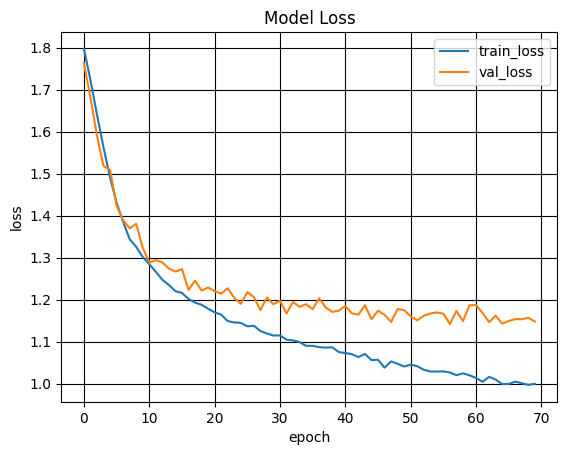

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.grid(True, color='k')
plt.show()

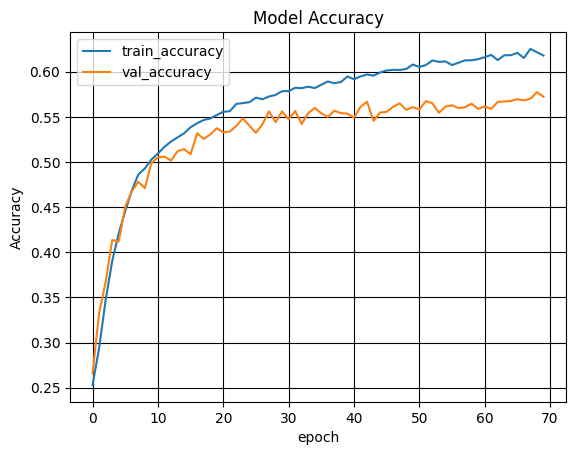

In [55]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'])
plt.grid(True, color='k')
plt.show()

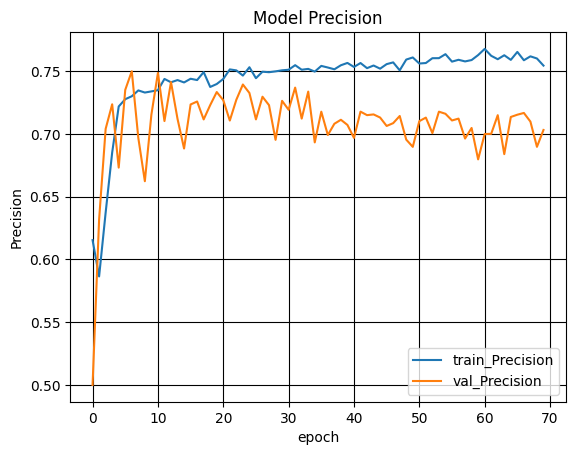

In [58]:
plt.plot(history.history['Preicsion'])
plt.plot(history.history['val_Preicsion'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train_Precision','val_Precision'])
plt.grid(True, color='k')
plt.show()

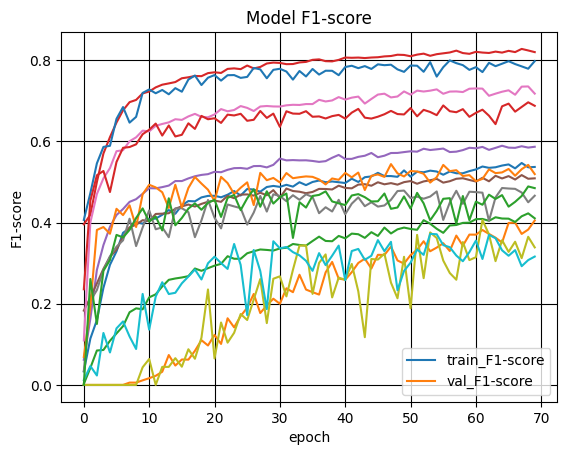

In [59]:
plt.plot(history.history['F1-score'])
plt.plot(history.history['val_F1-score'])
plt.title('Model F1-score')
plt.ylabel('F1-score')
plt.xlabel('epoch')
plt.legend(['train_F1-score','val_F1-score'])
plt.grid(True, color='k')
plt.show()

Make predictions from the test set

In [62]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [63]:
model_path = '/content/drive/MyDrive/Athesham_dataset/fer_Athessham_model.h5'
model = load_model(model_path)

In [64]:
test_path = '/content/test'

In [65]:
test_g =  ImageDataGenerator(rescale = 1./255)

In [68]:
generate_Test = test_g.flow_from_directory(
    test_path,
    target_size = (48,48),
    color_mode = 'grayscale',
    batch_size = 1,
    class_mode = None,
    shuffle = False,
    seed = 42,

)

Found 7178 images belonging to 7 classes.


In [69]:
prediction_images =  50

In [70]:
def predict_img(generate_Test, model, prediction_images):
  cl_label =  list(generate_Test.class_indices.keys())
  for i in range(prediction_images):
    img = generate_Test[i]
    pred =  model.predict(img)
    pre_class =  np.argmax(pred[0])

    plt.figure(figsize =(6,6))
    plt.imshow(img[0].reshape(48,48), cmap='gray')
    plt.title(f'prediction:{cl_label[pre_class]}')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


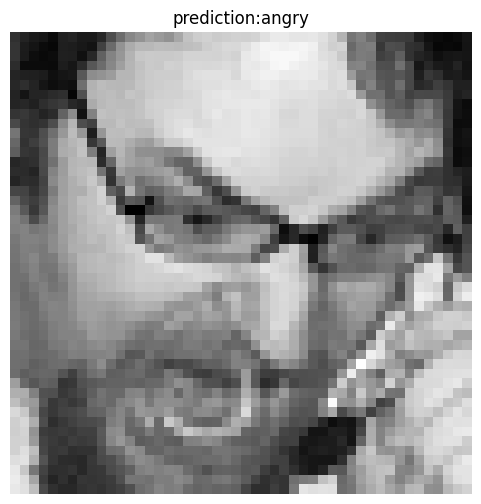

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


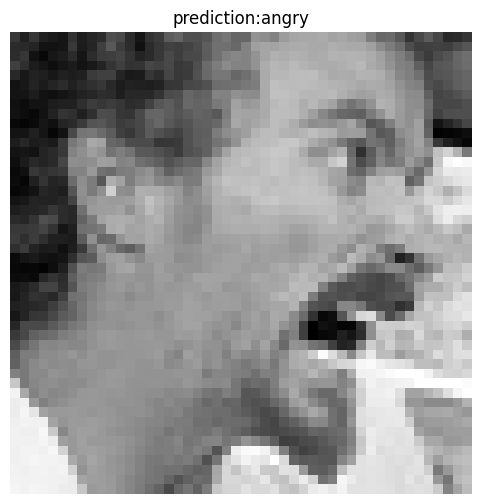

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


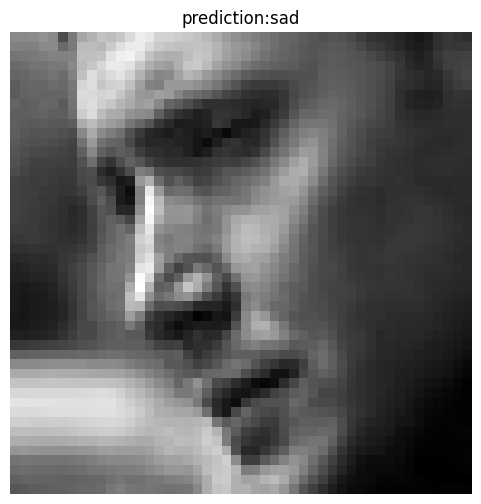

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


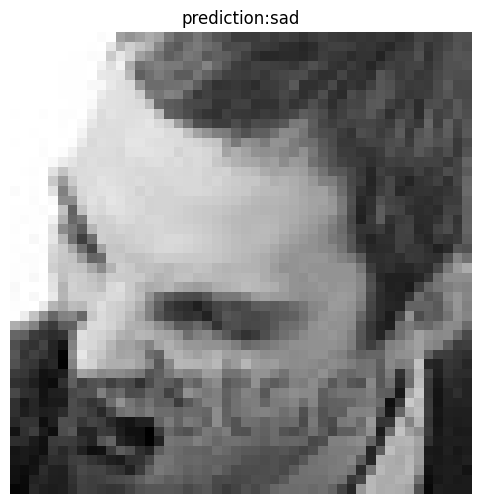

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


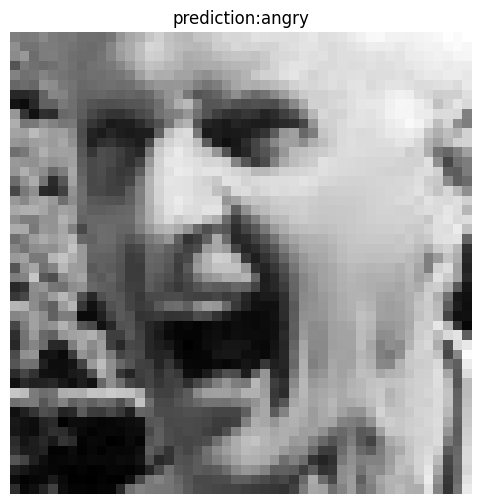

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


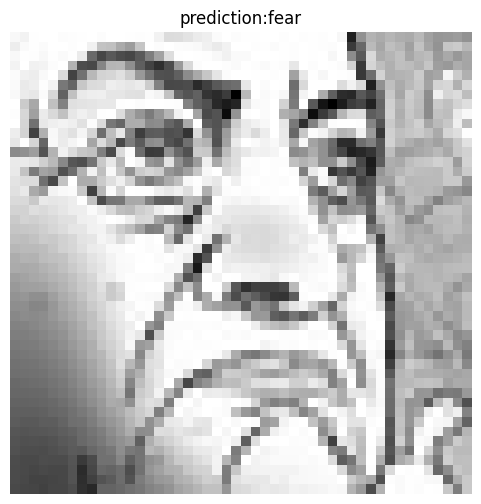

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


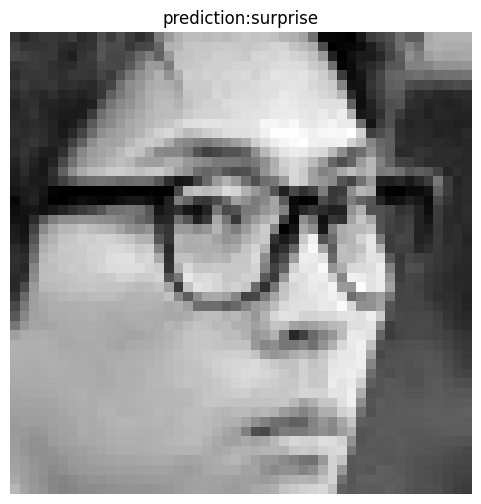

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


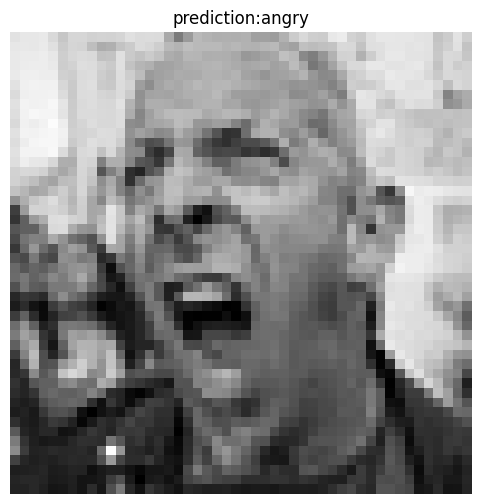

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


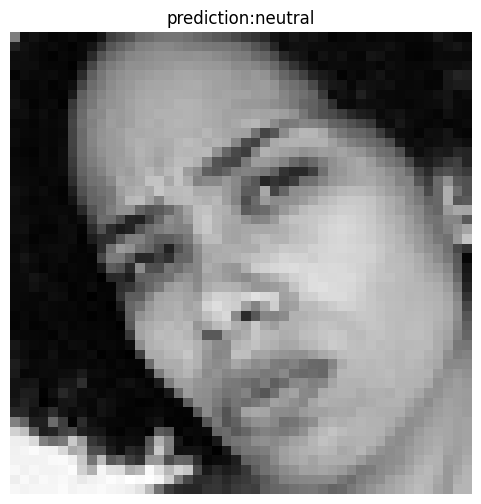

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


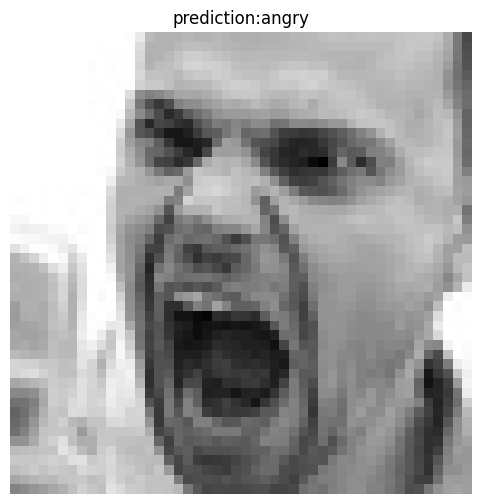

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


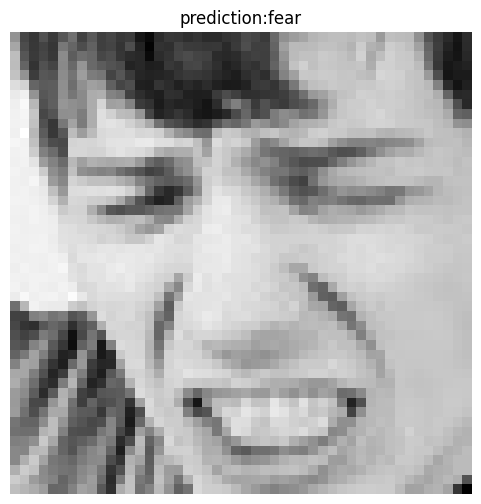

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


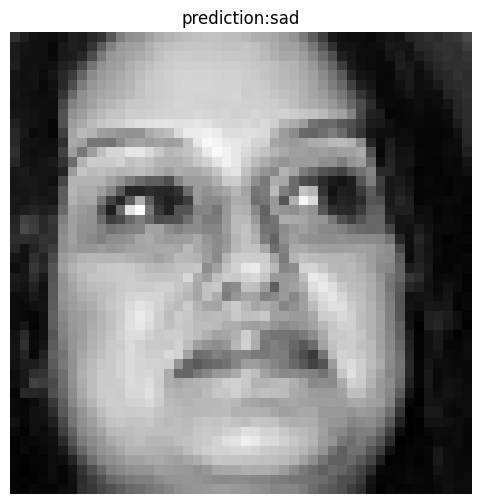

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


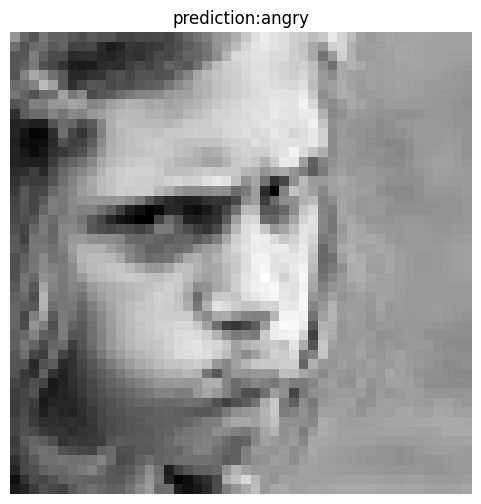

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


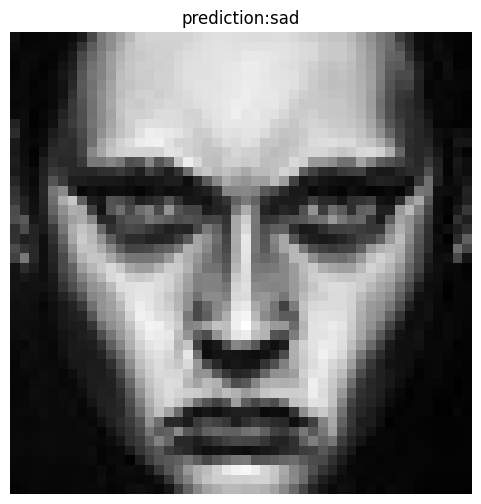

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


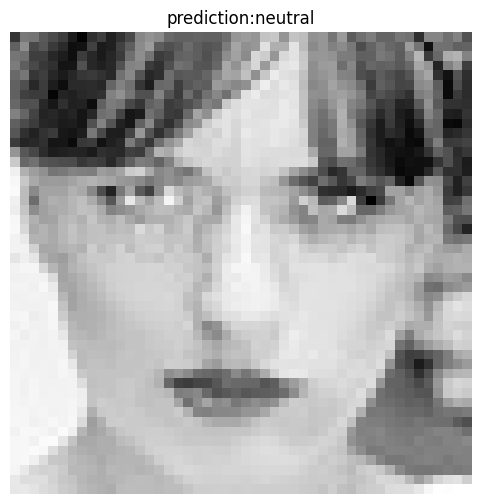

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


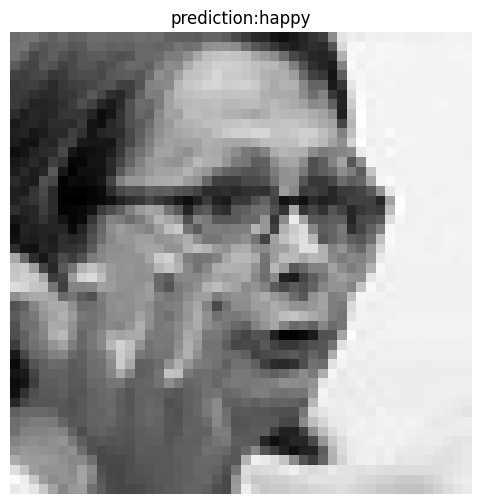

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


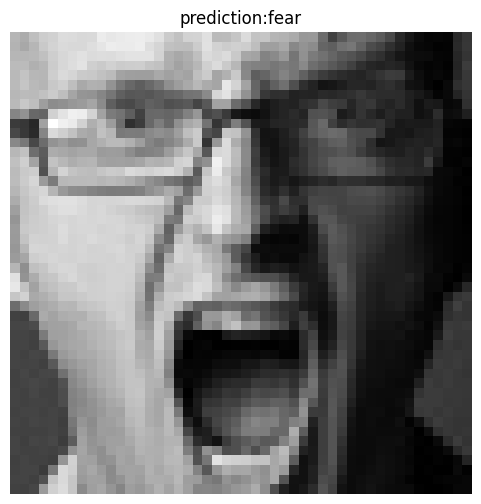

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


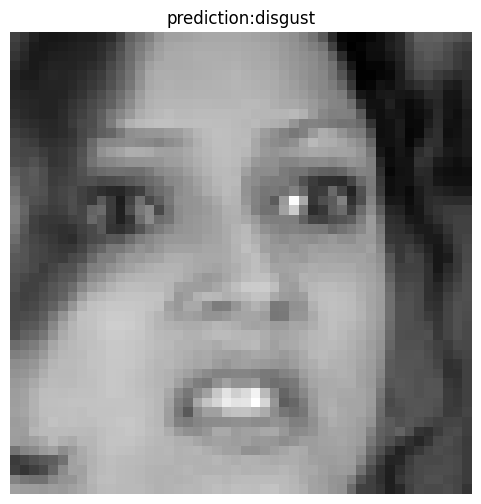

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


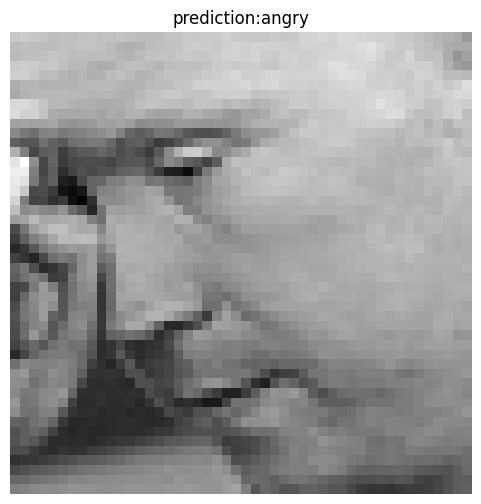

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


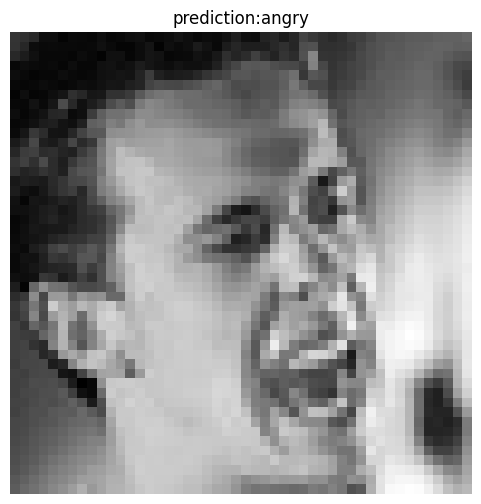

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


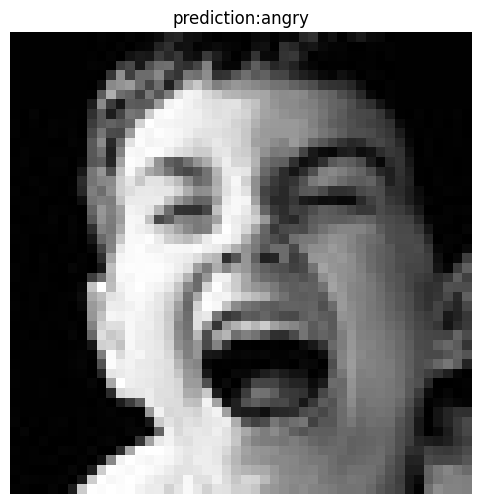

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


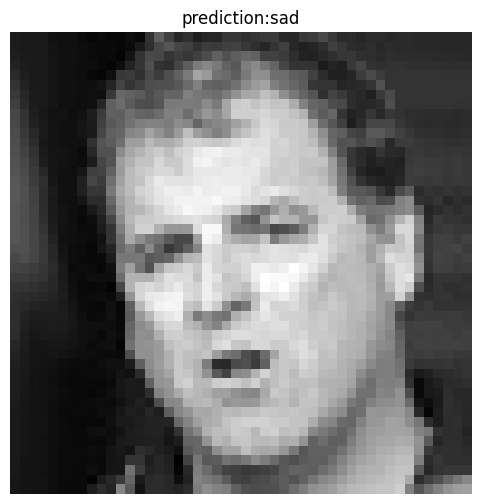

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


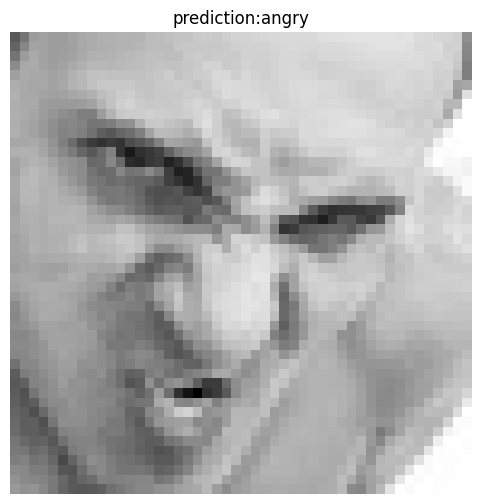

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


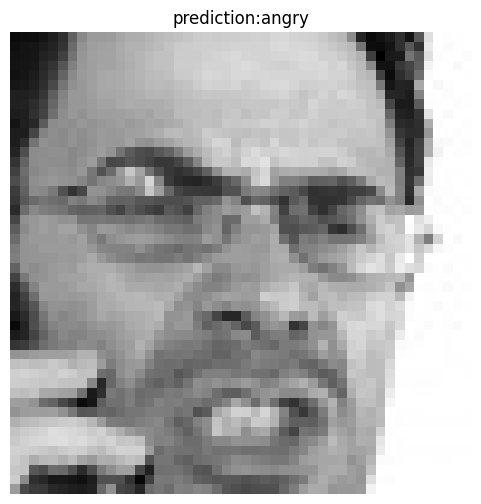

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


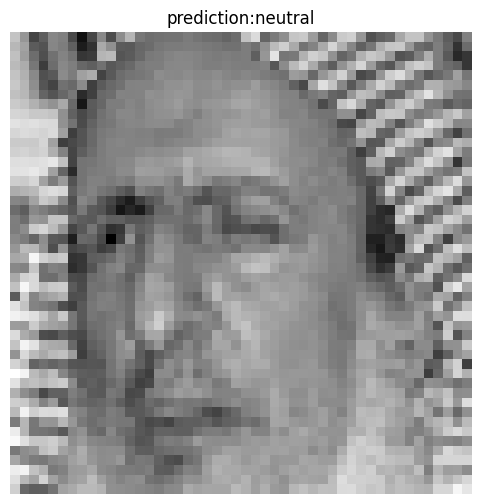

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


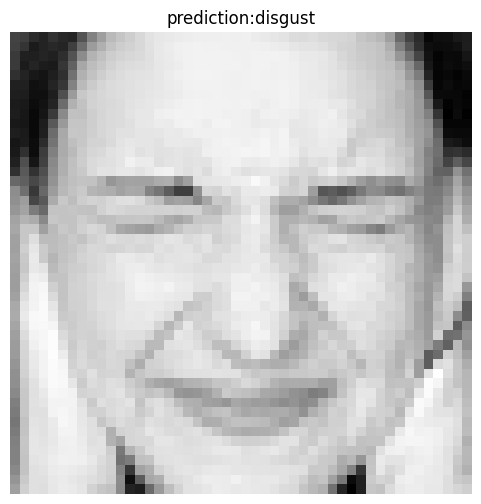

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


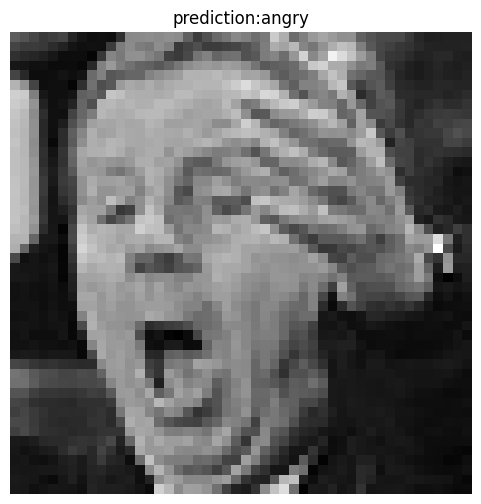

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


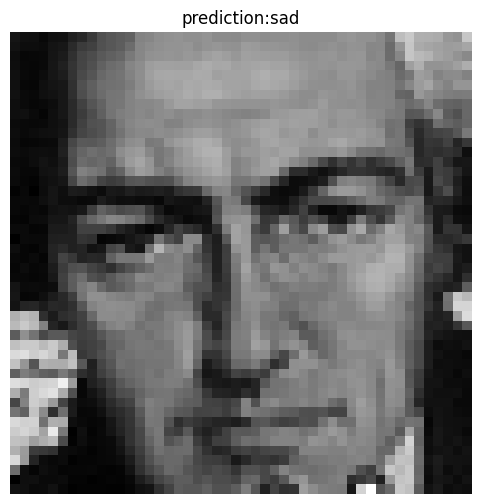

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


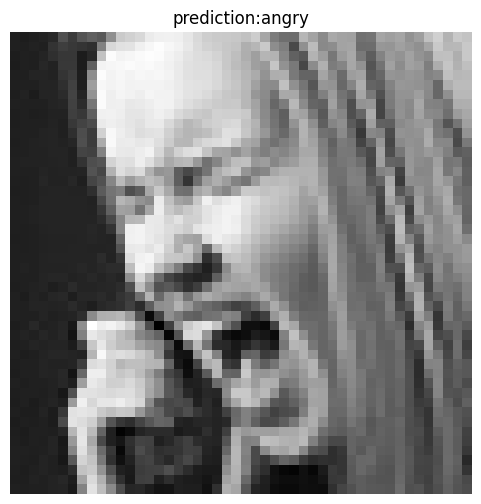

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


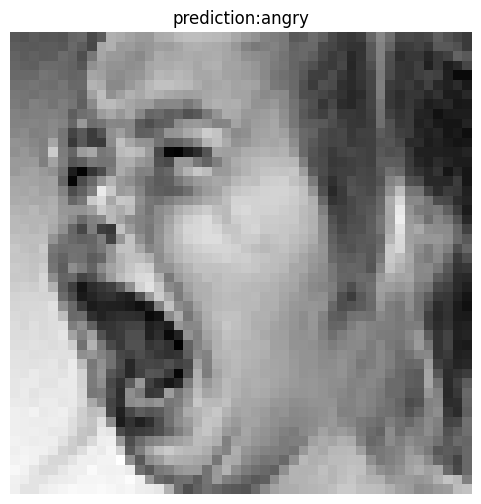

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


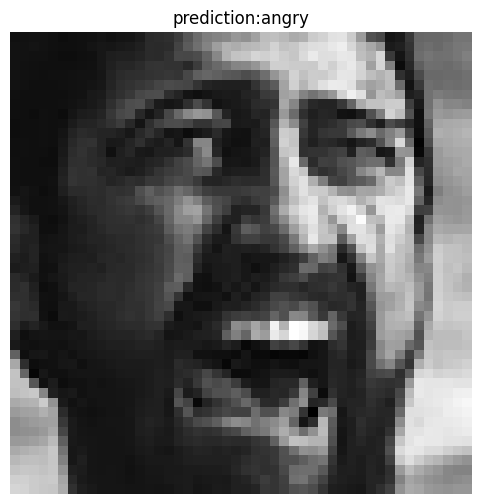

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


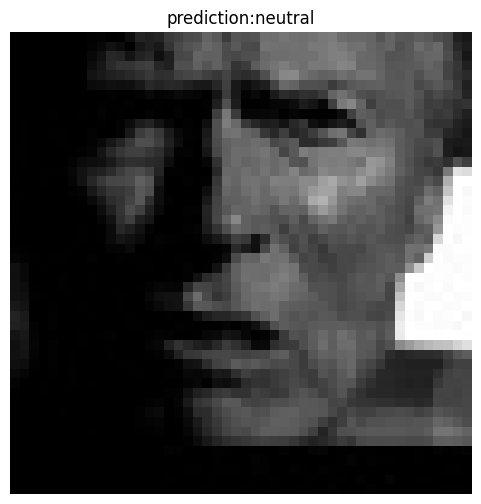

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


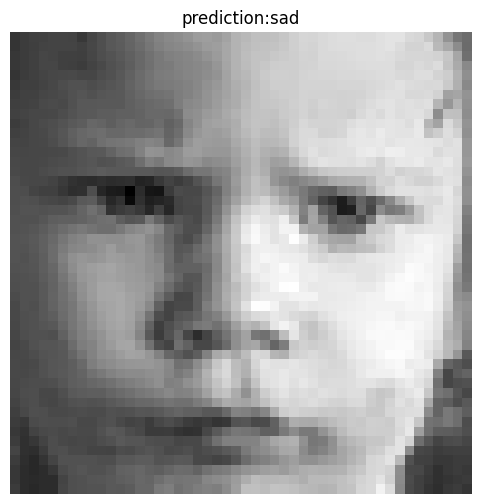

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


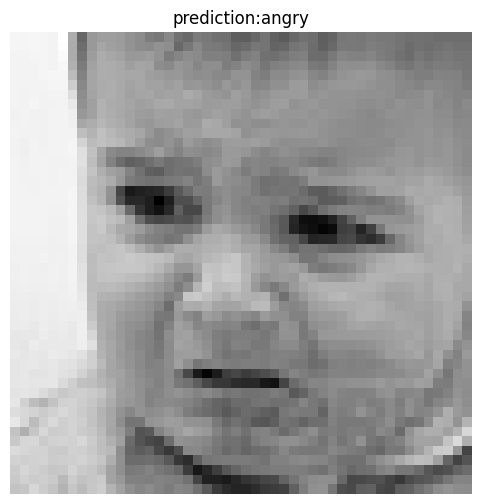

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


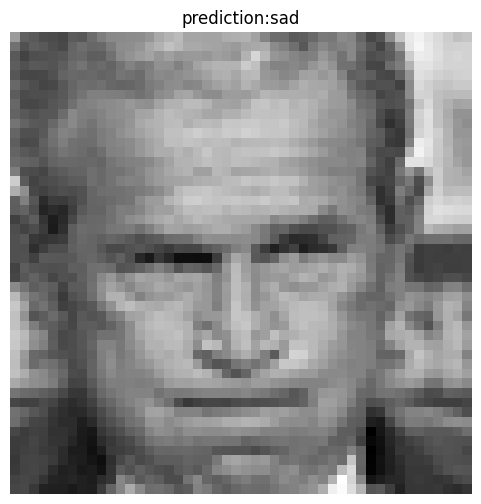

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


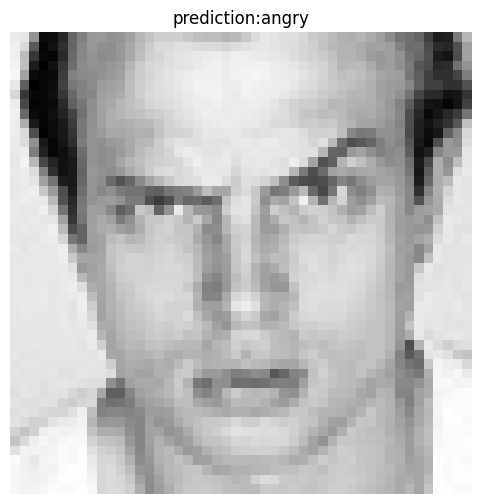

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


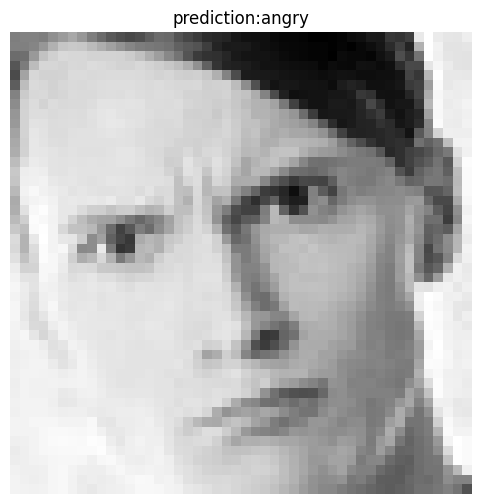

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


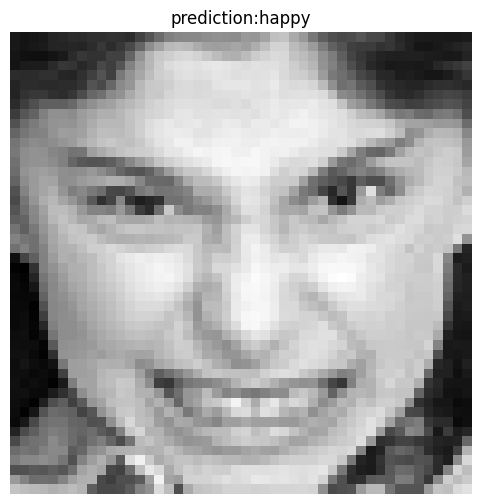

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


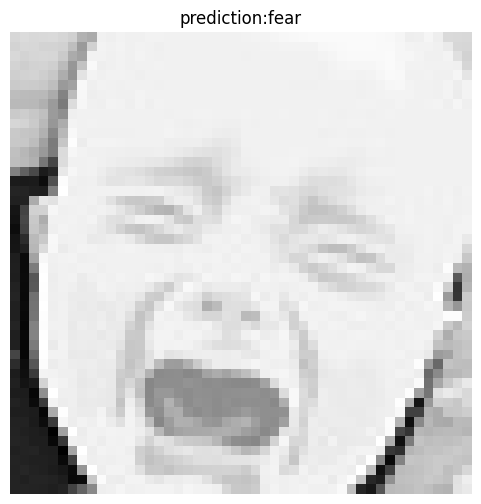

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


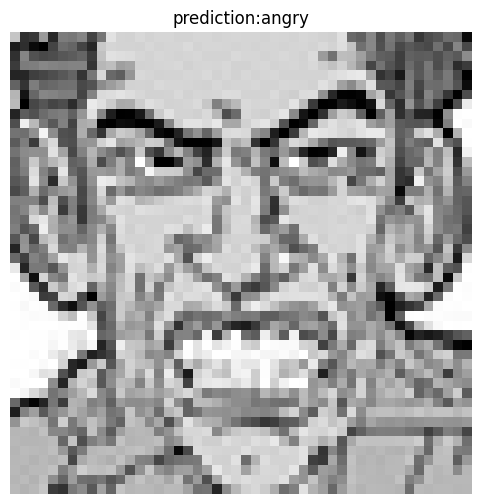

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


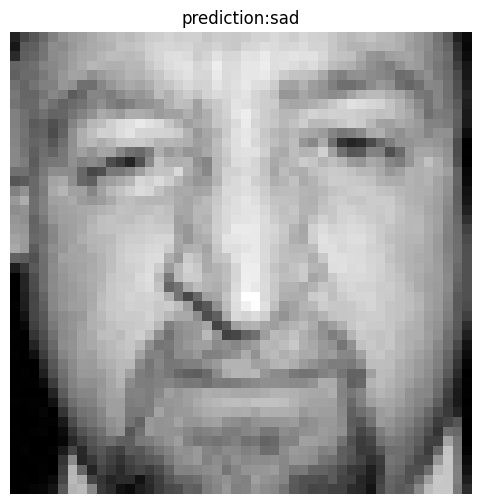

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


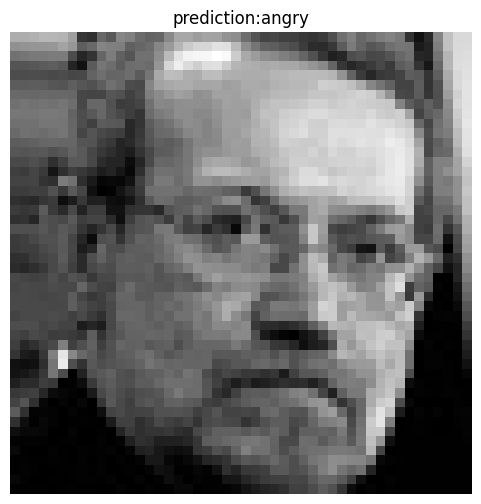

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


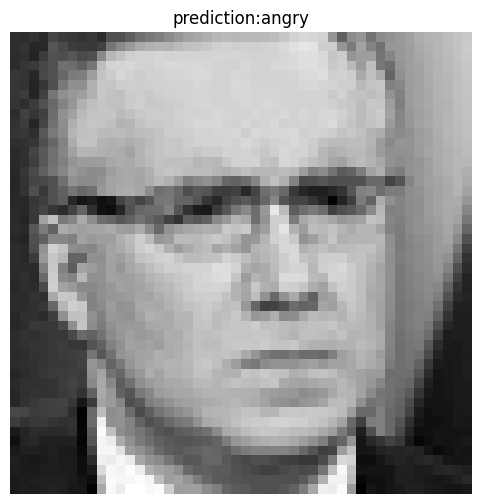

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


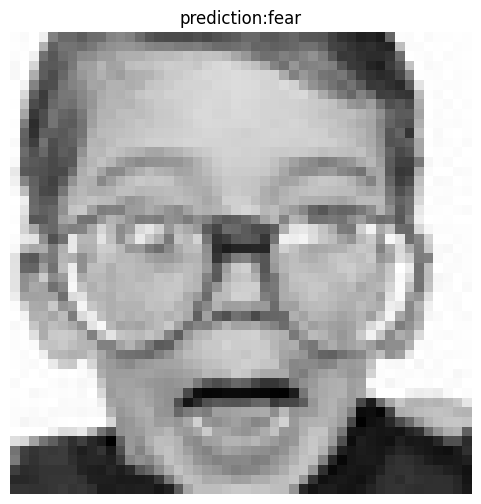

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


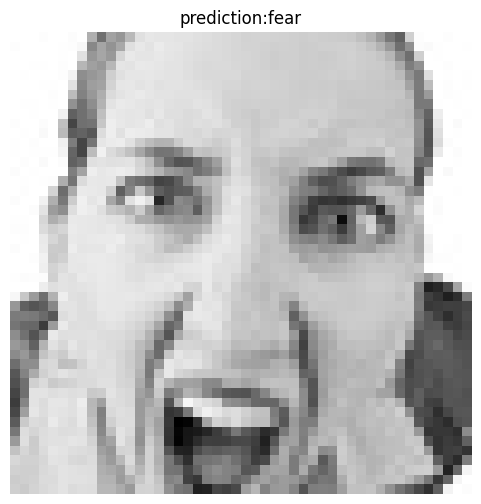

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


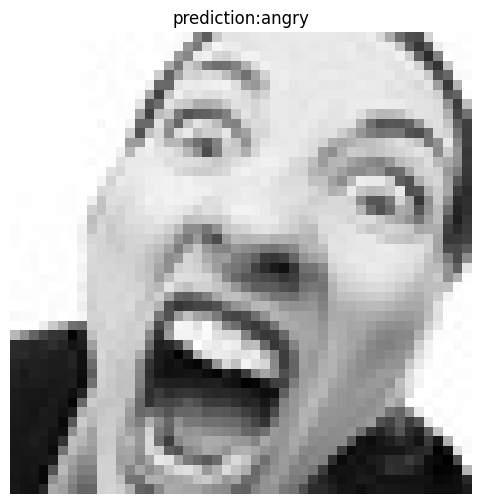

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


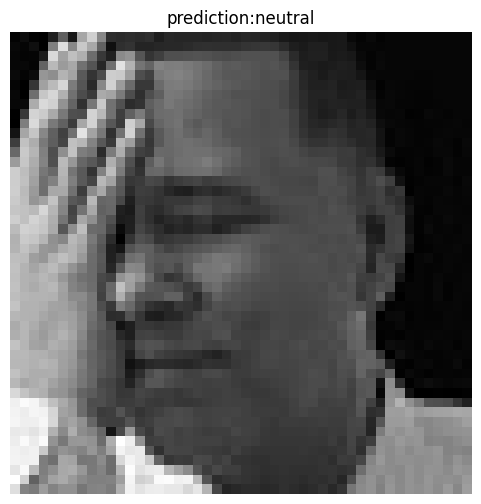

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


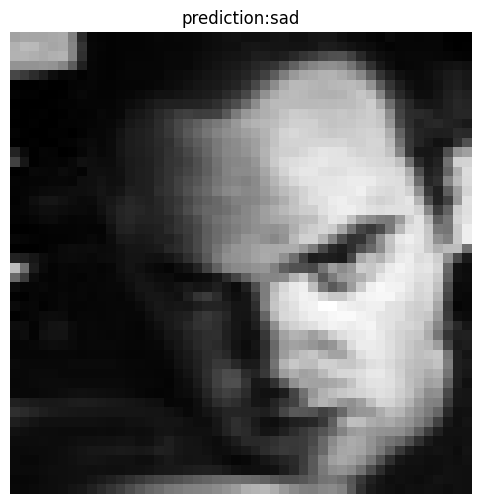

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


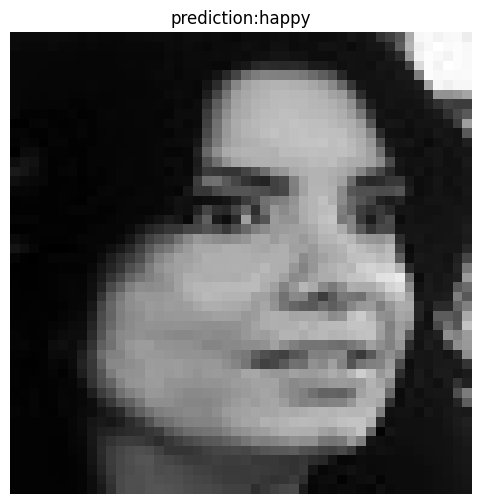

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


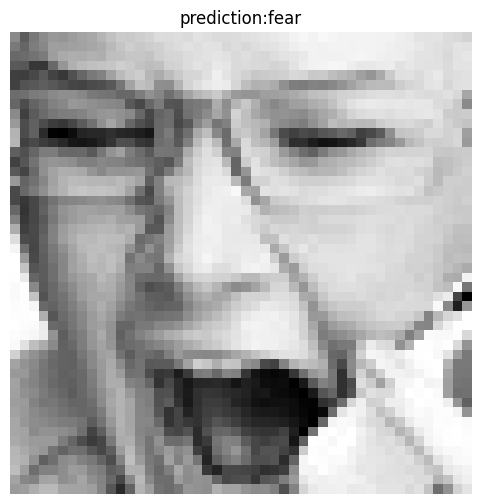

In [71]:
predict_img(generate_Test, model, prediction_images)